Estos datos están sacados de la empresa donde trabajo (Dawer Brokers SRL). 
La empresa es un broker que se dedica a la venta de seguros y la verificación de siniestros. Yo soy empleado del área de sistemas y me dedico al desarrollo de aplicaciones de seguros. Cuando les pedí a mis jefes un dataset para analizar, estuvieron más que contentos de dármelo (junto con mil pedidos de cosas que ellos querían averiguar).

En particular, este dataset corresponde a una de las exportaciones (resumen de información relevante de las ventas) del seguro FIELPET, un seguro de mascotas que cubre gastos veterinarios. El dataset contiene información de las ventas de los últimos 5 años, tiene 10466 registros y 45 variables.


In [1]:
mascotas <- read.csv("ExpoMascotas.csv", header = TRUE, sep = ";")

In [2]:
dim(mascotas)

[1] 10466    45

In [3]:
summary(mascotas)

       Id             Cia             Certificado         Poliza       
 Min.   : 58595   Length:10466       Min.   :131199   Min.   :2156307  
 1st Qu.:106854   Class :character   1st Qu.:174674   1st Qu.:2446545  
 Median :116190   Mode  :character   Median :195270   Median :2583973  
 Mean   :125305                      Mean   :189955   Mean   :2546312  
 3rd Qu.:144313                      3rd Qu.:206553   3rd Qu.:2656980  
 Max.   :179591                      Max.   :297929   Max.   :2731977  
                                     NA's   :358      NA's   :358      
    Fecha              Ciclo             Agencia             Local          
 Length:10466       Length:10466       Length:10466       Length:10466      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                       

Bajo la idea de que "entra basura, sale basura", hay que hacer un tratamiento de los datos porque vienen con un poco de basura (lo sé porque fui yo el que programó esto).

In [4]:
colnames(mascotas)

[1] "Id"                         "Cia"                       
 [3] "Certificado"                "Poliza"                    
 [5] "Fecha"                      "Ciclo"                     
 [7] "Agencia"                    "Local"                     
 [9] "Provincia"                  "Localidad"                 
[11] "Vendedor"                   "Cod.Vend"                  
[13] "Estado"                     "Cliente.Apellido"          
[15] "Cliente.Nombre"             "Sexo"                      
[17] "Tipo.y.Nro.Doc."            "Fecha.Nacimiento"          
[19] "Campania"                   "Producto"                  
[21] "Importe"                    "Medio.Pago"                
[23] "Nro.Pago"                   "Vto."                      
[25] "Cargado.por"                "Motivo"                    
[27] "Observaciones"              "Email"                     
[29] "Telefono.en.solicitud"      "Celular.en.solicitud"      
[31] "Celular"                    "Imei"                      
[33] "Tipo.Mascota"               "Mascota.Fec.Nac"           
[35] "Nombre.Mascota"             "Raza.Mascota"              
[37] "Sexo.Mascota"               "Observacion.anterior"      
[39] "Monto.Deuda"                "Cuotas.Adeudadas"          
[41] "Poliza.Anterior"            "Ultimo.estado"             
[43] "Ultimo.motivo"              "Ultima.observacion"        
[45] "Ultima.fecha.cambio.estado"

La columna principal de clasificación es Estado. Estas representan los estados de la solicitud. También podemos considerar que otra clasifiación es la de Medio.Pago (que representa el medio de pago de la venta). Finalmente, Raza.Mascota podría ser otra clasificación, pero esa tiene algunos grandes problemas.

Escribo esto luego de terminar el TP, pero volví a hacer algunos pasos usando la variable Producto como clasificación.

Vamos a eliminar las siguientes columnas porque no contienen información relevante para el análisis: 'Cia','Certificado','Poliza,'Ciclo','Local','Cod.Vend','Cliente.Apellido''Cliente.Nombre', 'Tipo.y.Nro.Doc.','Nro.Pago''Vto.','Cargado.por','Motivo','Observaciones','Email','Telefono.en.solicitud','Celular.en.solicitud','Celular','Imei','Nombre.Mascota','Observacion.anterior','Monto.Deuda','Cuotas.Adeudadas','Poliza.Anterior','Ultimo.estado','Ultimo.motivo','Ultima.observacion','Ultima.fecha.cambio.estado'


In [2]:
#Buscamos los índices y los borramos
borrar <- c("Localidad","Cia","Certificado","Poliza","Ciclo","Local","Cod.Vend","Cliente.Apellido","Cliente.Nombre", "Tipo.y.Nro.Doc.","Nro.Pago","Vto.","Cargado.por","Motivo","Observaciones","Email","Telefono.en.solicitud","Celular.en.solicitud","Celular","Imei","Nombre.Mascota","Observacion.anterior","Monto.Deuda","Cuotas.Adeudadas","Poliza.Anterior","Ultimo.estado","Ultimo.motivo","Ultima.observacion","Ultima.fecha.cambio.estado")
indexABorrar <- which(names(mascotas) %in% borrar)
mascotasFiltradas <- mascotas[, -indexABorrar]

Por otro lado, el tema de la raza: recién este año implementamos en el sistema un selector de razas para unificar las selecciones de los usuarios. Anteriormente teníamos cosas como mestrizo, Mestizo, MESTIZO, MESTIZA, CANICHE 🥰 (sí, esa última fue de verdad y nos crasheó todo el sistema). 

Guiándome también por lo que me dijo Fari de bajar la cantidad de puntos a algo razonable, me voy a quedar con cerca de 2000 entradas que corresponden a las solicitudes que se efectuaron bajo el nuevo sistema de selección de razas.
 

In [3]:
#Las razas estandarizadas arrancan más o menos desde la entrada 8076
mascotasFiltradas <- mascotasFiltradas[8076:dim(mascotasFiltradas)[1],]

In [4]:
dim(mascotasFiltradas)
summary(mascotasFiltradas)

[1] 2391   16

       Id            Fecha             Agencia           Provincia        
 Min.   :147211   Length:2391        Length:2391        Length:2391       
 1st Qu.:159397   Class :character   Class :character   Class :character  
 Median :168054   Mode  :character   Mode  :character   Mode  :character  
 Mean   :166387                                                           
 3rd Qu.:173589                                                           
 Max.   :179591                                                           
   Vendedor            Estado              Sexo           Fecha.Nacimiento  
 Length:2391        Length:2391        Length:2391        Length:2391       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

Ahora hay que jugar un poco con las columnas, para unificar los valores. Por ejemplo, el campo Sexo tiene "Fem." y "fem" como valores. Así pasa con varios que vamos a ir viendo cómo arreglarlos.


In [5]:
transformarSexo <- function(x) {
  if (x == "fem" || x == "Fem." || x == "Hembra") {
    return(0)
  } else if (x == "masc" || x == "Masc." || x == "mas" || x == "Macho") {
    return(1)
  }
}

mascotasFiltradas$Sexo <- sapply(mascotasFiltradas$Sexo, transformarSexo)
mascotasFiltradas$Sexo.Mascota <- sapply(mascotasFiltradas$Sexo.Mascota, transformarSexo)



Limpiamos los que tengan el símbolo '$'

In [6]:
transformarImporte <- function(x){
    if (x == "$ 744"){
        return(744)
    } else if ( x == "$ 575"){
        return(575)
    }else{
        return(as.numeric(x))
    }
}

mascotasFiltradas$Importe <- sapply(mascotasFiltradas$Importe, transformarImporte)

Pasamos las fechas a formato KSP.

In [7]:
transformarFecha <- function(x){
    fecha <- as.Date(x, format = "%d/%m/%Y")
    anio <- as.numeric(substr(x, nchar(x)-3, nchar(x)))
    jan_1 <- as.Date(paste("01/01/", anio, sep = ""), format = "%d/%m/%Y")
    days_starting_jan_1 <- fecha - as.Date(jan_1, format = "%d/%m/%Y")
    KSP.Date <- anio + ((days_starting_jan_1 - 0.5) /365)
    return(KSP.Date)
}

mascotasFiltradas$Fecha <- sapply(mascotasFiltradas$Fecha, transformarFecha)
mascotasFiltradas$Mascota.Fec.Nac <- sapply(mascotasFiltradas$Mascota.Fec.Nac, transformarFecha)
mascotasFiltradas$Fecha.Nacimiento <- sapply(mascotasFiltradas$Fecha.Nacimiento, transformarFecha)

Ahora hacemos binning con el resto de las variables

La mayoría de las solicitudes se efectuaron en Dawer Brokers, muy poquitas en otra agencia.

In [8]:
transformarDawerBrokers <- function(x){
    if (x == "Dawer Brokers"){
        return(1)
    } else {
        return(0)
    }
}
mascotasFiltradas$Agencia <- sapply(mascotasFiltradas$Agencia, transformarDawerBrokers)

¿Pagó con transferencia o con tarjeta?

In [9]:
transformarCBU <- function(x){
    if (substr(x, 1, 3) == "CBU"){
        return(1)
    } else {
        return(0)
    }
}
mascotasFiltradas$Medio.Pago <- sapply(mascotasFiltradas$Medio.Pago, transformarCBU)


Perro o gato, no aseguran otra mascota.

In [10]:
transformarTipoMascota <- function(x){
    if (x == "PERRO"){
        return(1)
    } else {
        return(0)
    }
}

mascotasFiltradas$Tipo.Mascota <- sapply(mascotasFiltradas$Tipo.Mascota, transformarTipoMascota)


In [11]:
length(unique(mascotasFiltradas$Vendedor)) #Solo hay 10 vendedores
mascotasFiltradas$Vendedor <- as.numeric(as.factor(mascotasFiltradas$Vendedor))

[1] 10

El resto de las variables las podemos pasar a numéricas sin consideración previa.

In [12]:
mascotasFiltradas$Provincia <- as.numeric(as.factor(mascotasFiltradas$Provincia))
mascotasFiltradas$Vendedor <- as.numeric(as.factor(mascotasFiltradas$Vendedor))
mascotasFiltradas$Campania <- as.numeric(as.factor(mascotasFiltradas$Campania))
mascotasFiltradas$Estado <- as.numeric(as.factor(mascotasFiltradas$Estado))
mascotasFiltradas$Producto <- as.numeric(as.factor(mascotasFiltradas$Producto))
mascotasFiltradas$Raza.Mascota <- as.numeric(as.factor(mascotasFiltradas$Raza.Mascota)) #Quizás debería hacer binning de las razas, pero no sabría cómo agruparlas

In [13]:

mascotasFiltradas[1,]

,Id,Fecha,Agencia,Provincia,Vendedor,Estado,Sexo,Fecha.Nacimiento,Campania,Producto,Importe,Medio.Pago,Tipo.Mascota,Mascota.Fec.Nac,Raza.Mascota,Sexo.Mascota
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8076,147211,2022.095,1,15,5,3,0,1984.826,1,2,744,0,1,2014.771,30,0


In [15]:
summary(mascotasFiltradas)

       Id             Fecha         Agencia         Provincia     
 Min.   :147211   Min.   :2022   Min.   :0.0000   Min.   : 1.000  
 1st Qu.:159397   1st Qu.:2022   1st Qu.:1.0000   1st Qu.: 1.000  
 Median :168054   Median :2023   Median :1.0000   Median : 2.000  
 Mean   :166387   Mean   :2023   Mean   :0.9979   Mean   : 5.507  
 3rd Qu.:173589   3rd Qu.:2023   3rd Qu.:1.0000   3rd Qu.: 6.000  
 Max.   :179591   Max.   :2023   Max.   :1.0000   Max.   :24.000  
    Vendedor          Estado           Sexo        Fecha.Nacimiento
 Min.   : 1.000   Min.   :1.000   Min.   :0.0000   Min.   :1942    
 1st Qu.: 5.000   1st Qu.:3.000   1st Qu.:0.0000   1st Qu.:1985    
 Median : 7.000   Median :3.000   Median :0.0000   Median :1993    
 Mean   : 6.345   Mean   :3.124   Mean   :0.2882   Mean   :1991    
 3rd Qu.: 8.000   3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:1998    
 Max.   :10.000   Max.   :7.000   Max.   :1.0000   Max.   :2005    
    Campania        Producto        Importe        Medi

Una vez hecho el procesamiento de datos, vamos a visualizarlos

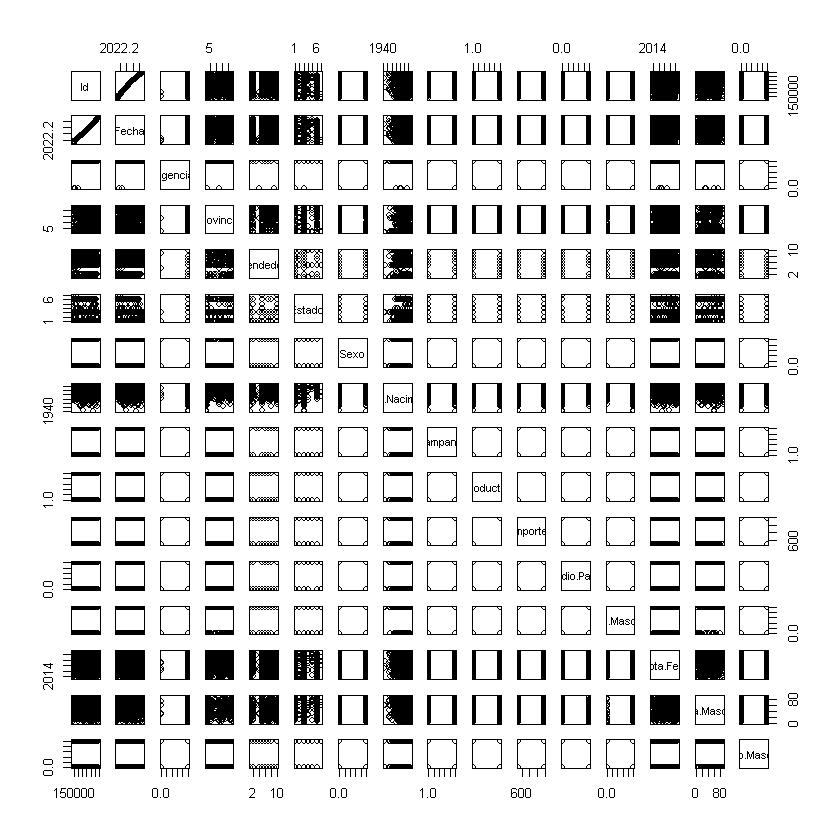

In [13]:
plot(mascotasFiltradas)

Claramente un plot así nomás no me aporta información. Tenemos que ser más inteligentes y ver otras cosas. Veamos primero un poco de información de color.

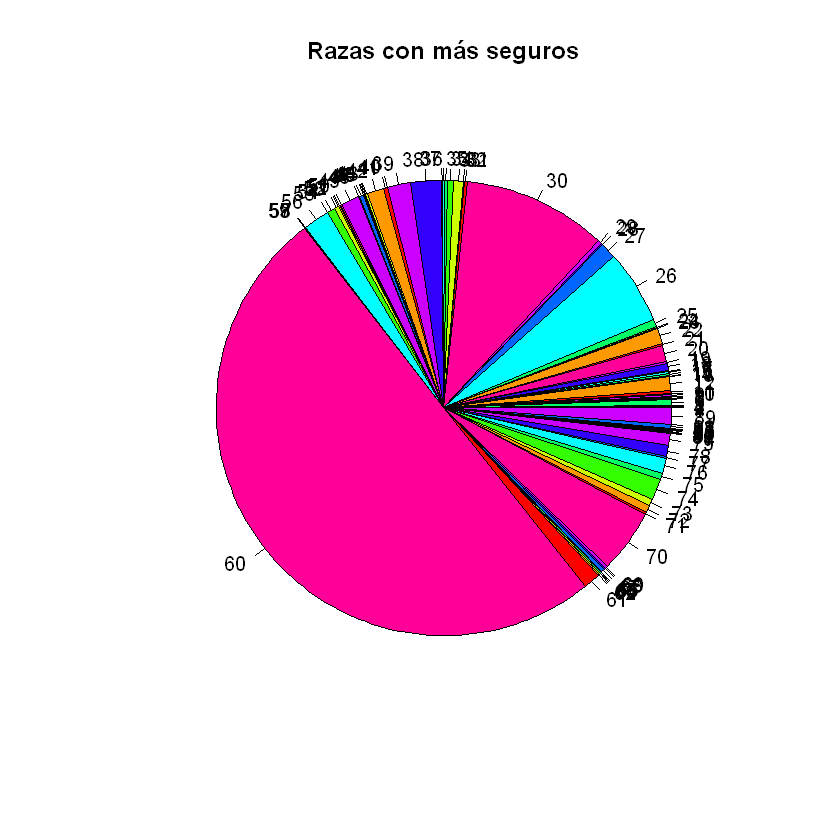

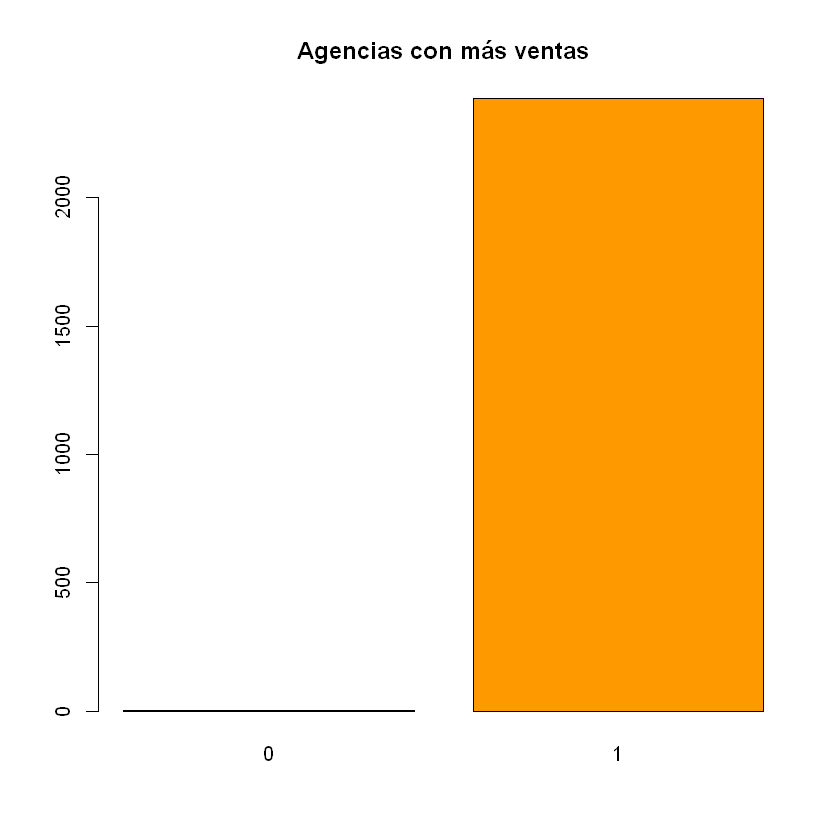

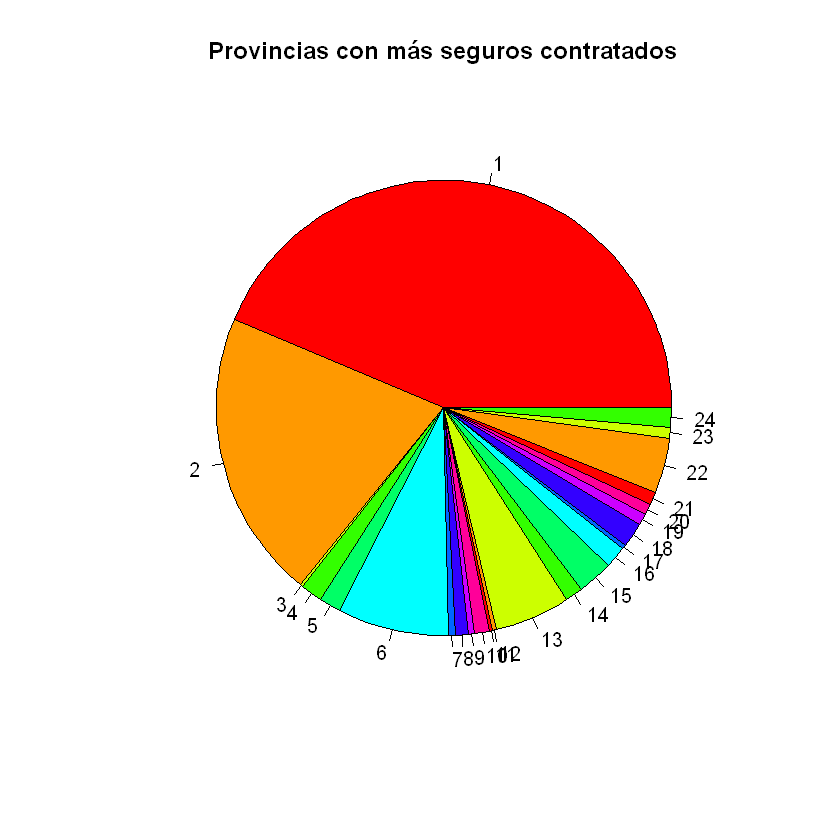

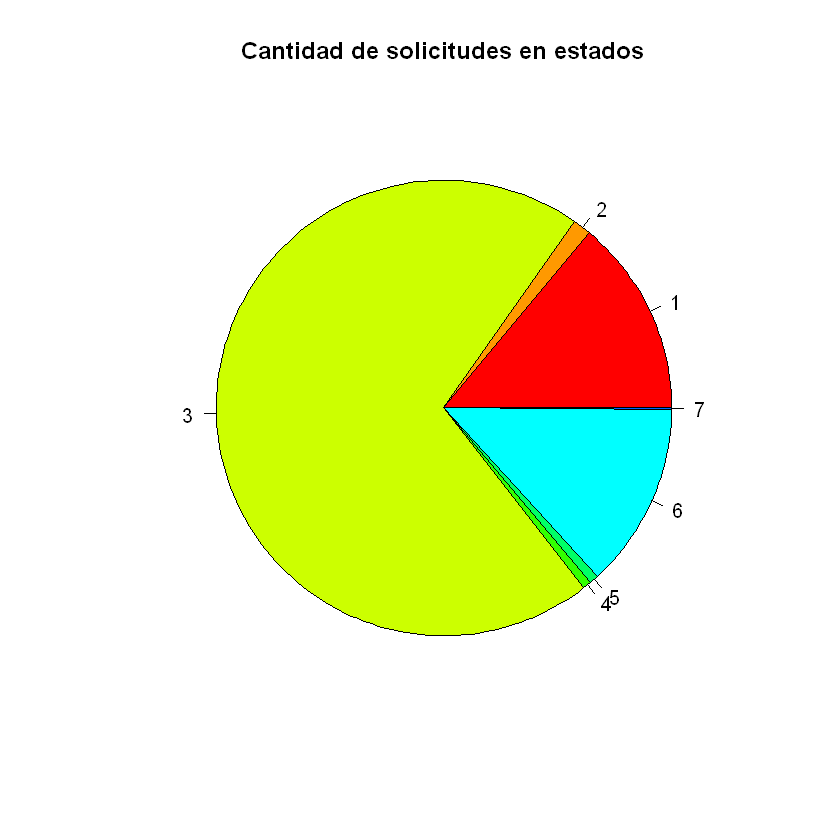

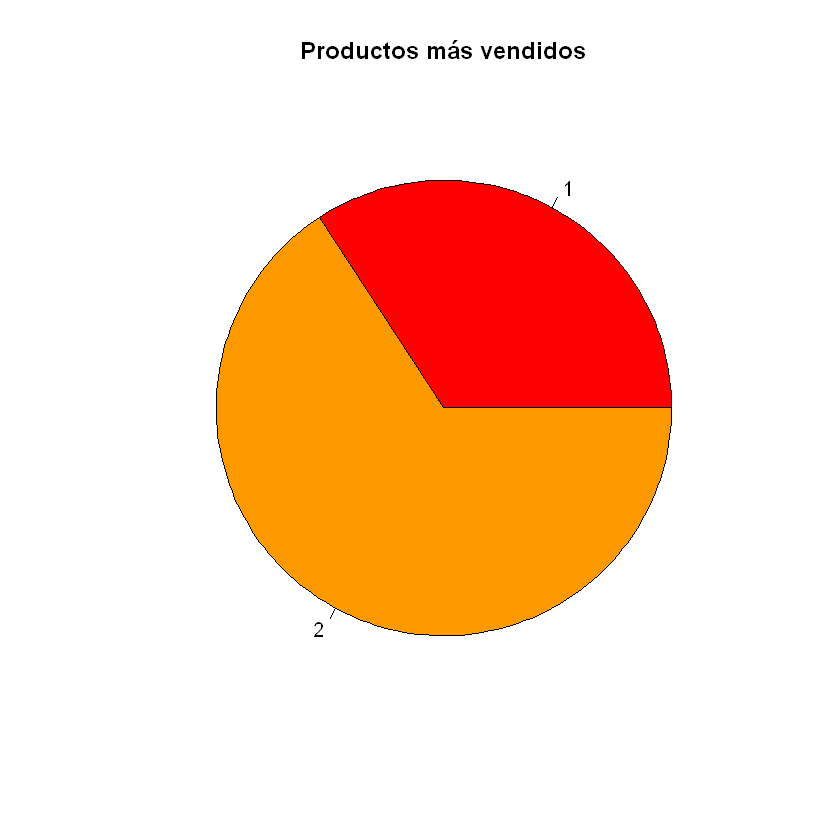

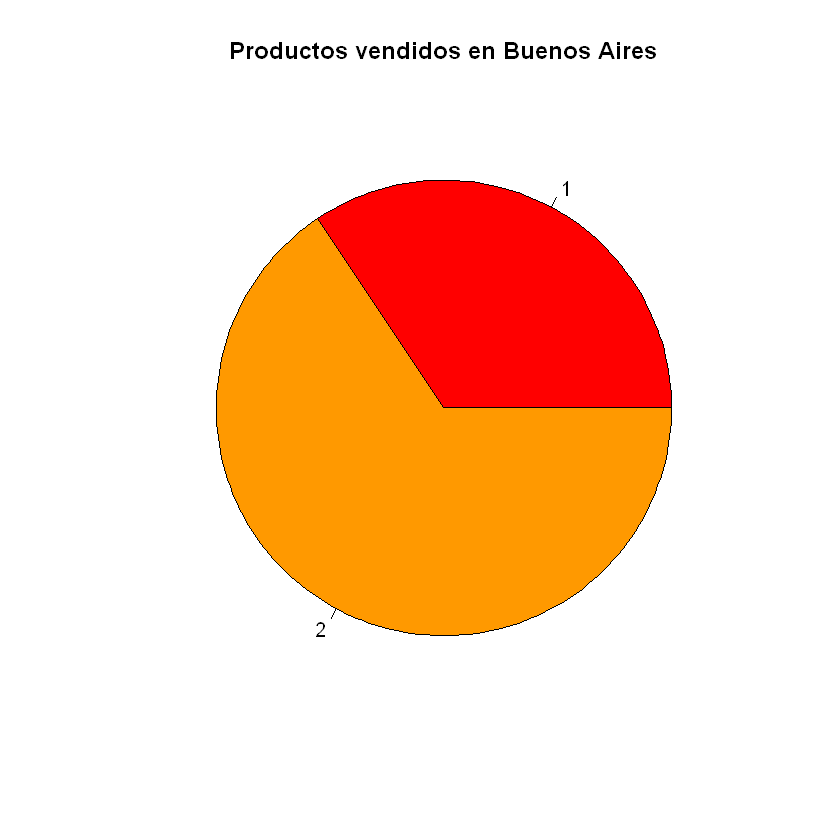

In [14]:
#Pie chart of razas
pie(table(mascotasFiltradas$Raza), main = "Razas con más seguros", col = rainbow(10))
# #Barplot of agencias
barplot(table(mascotasFiltradas$Agencia), main = "Agencias con más ventas", col = rainbow(10))
# #Piechart of provincias
pie(table(mascotasFiltradas$Provincia), main = "Provincias con más seguros contratados", col = rainbow(10))
#Pie cahrt of estados
pie(table(mascotasFiltradas$Estado), main = "Cantidad de solicitudes en estados", col = rainbow(10))
# #Pie chart of producto
pie(table(mascotasFiltradas$Producto), main = "Productos más vendidos", col = rainbow(10))
# #Pie chart of producto sold in buenos aires
pie(table(mascotasFiltradas$Producto[mascotasFiltradas$Provincia == 1]), main = "Productos vendidos en Buenos Aires", col = rainbow(10))

In [21]:
colnames(mascotasFiltradas)

[1] "Id"               "Fecha"            "Agencia"          "Provincia"       
 [5] "Vendedor"         "Estado"           "Sexo"             "Fecha.Nacimiento"
 [9] "Campania"         "Producto"         "Importe"          "Medio.Pago"      
[13] "Tipo.Mascota"     "Mascota.Fec.Nac"  "Raza.Mascota"     "Sexo.Mascota"

Voy a probar algunas combinaciones de variables a ver si me dan información de cómo determinar el estado de la solicitud. Va a ser difícil porque es toda información categórica, pero vamos a ver qué pasa.   

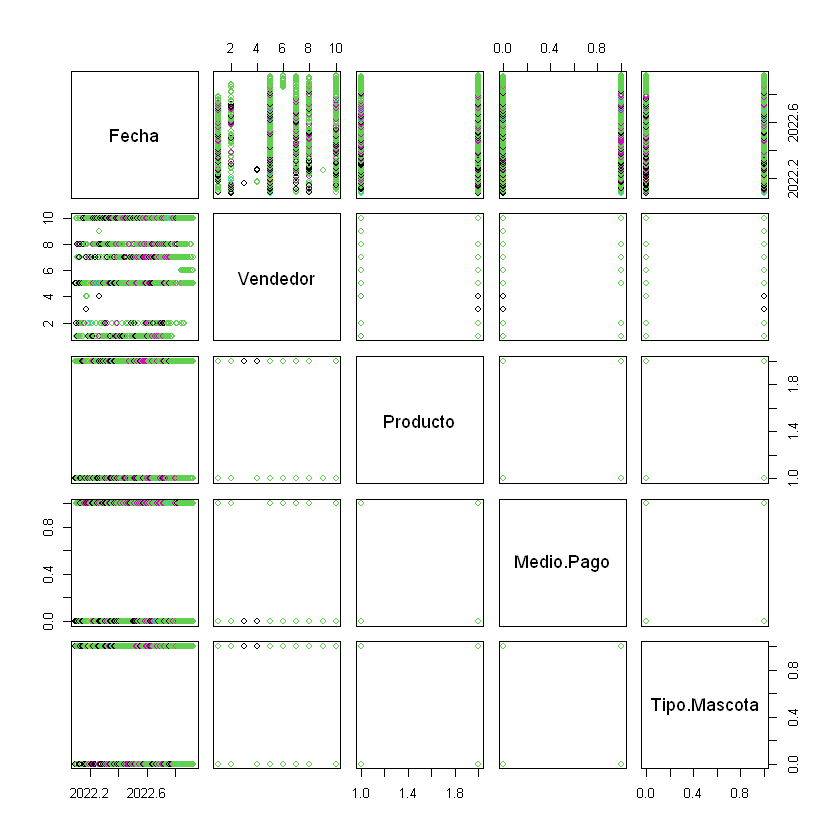

In [15]:
variables.mascotas.1 <- mascotasFiltradas[,c("Fecha", "Vendedor", "Producto", "Medio.Pago", "Tipo.Mascota")]
plot(variables.mascotas.1, col = mascotasFiltradas$Estado)

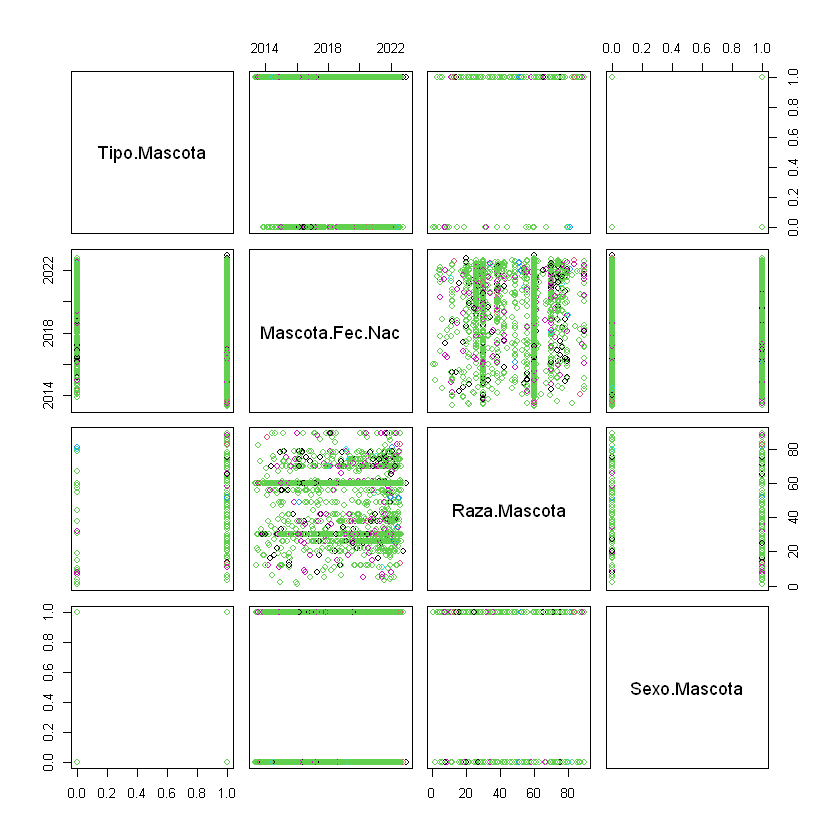

In [16]:
variables.mascotas.2 <- mascotasFiltradas[,c('Tipo.Mascota','Mascota.Fec.Nac','Raza.Mascota','Sexo.Mascota')]
plot(variables.mascotas.2, col = mascotasFiltradas$Estado)

Cruzándolo con la fecha de nacimiento de la mascota parece haber algo prometedor.

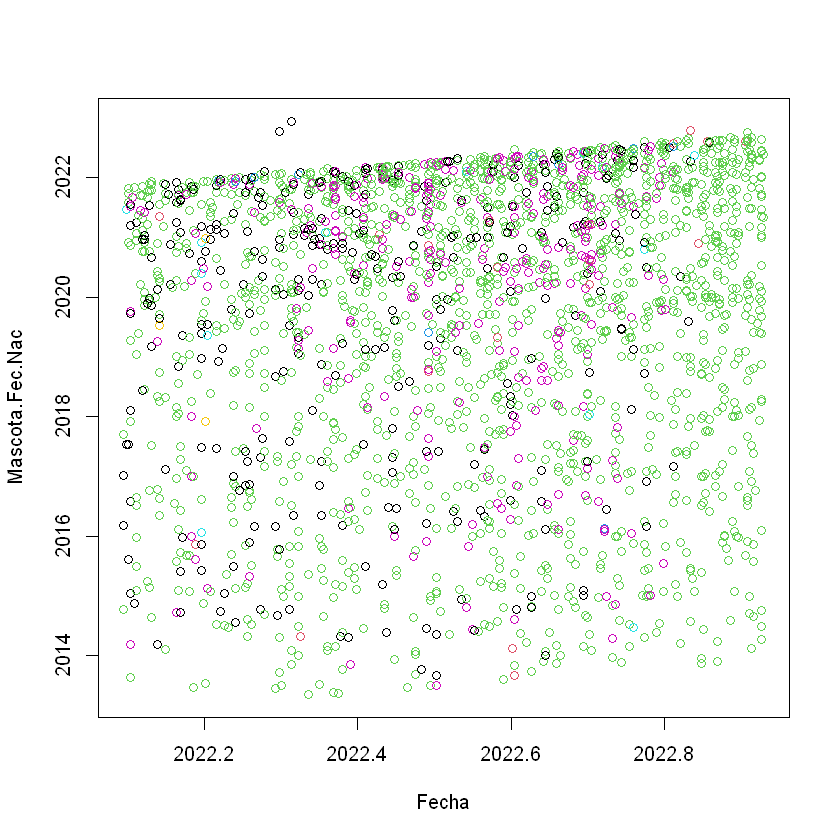

In [17]:
variables.mascotas.3 <- mascotasFiltradas[,c('Fecha','Mascota.Fec.Nac')]
plot(variables.mascotas.3, col = mascotasFiltradas$Estado)

Parece que las solicitudes más nuevas son las que más aceptadas son. Esto tiene sentido, porque son menos propensas a mostrar problemas (recién se emiten).

Veamos qué pasa con una PCA


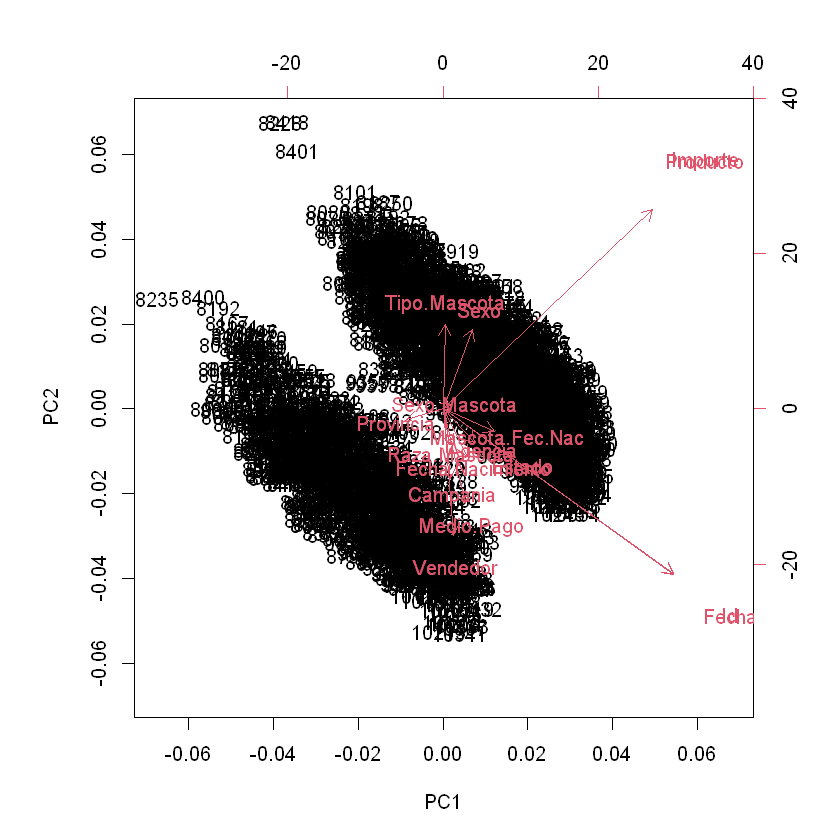

In [18]:
pca.mascotas <- prcomp(mascotasFiltradas, scale = TRUE)
biplot(pca.mascotas)

Si entiendo cómo analizar una PCA, la fecha es la variable que más aporta a la separación de los datos. Después de haber hecho todos los análisis, me doy cuenta que la variable producto y precio son iguales.

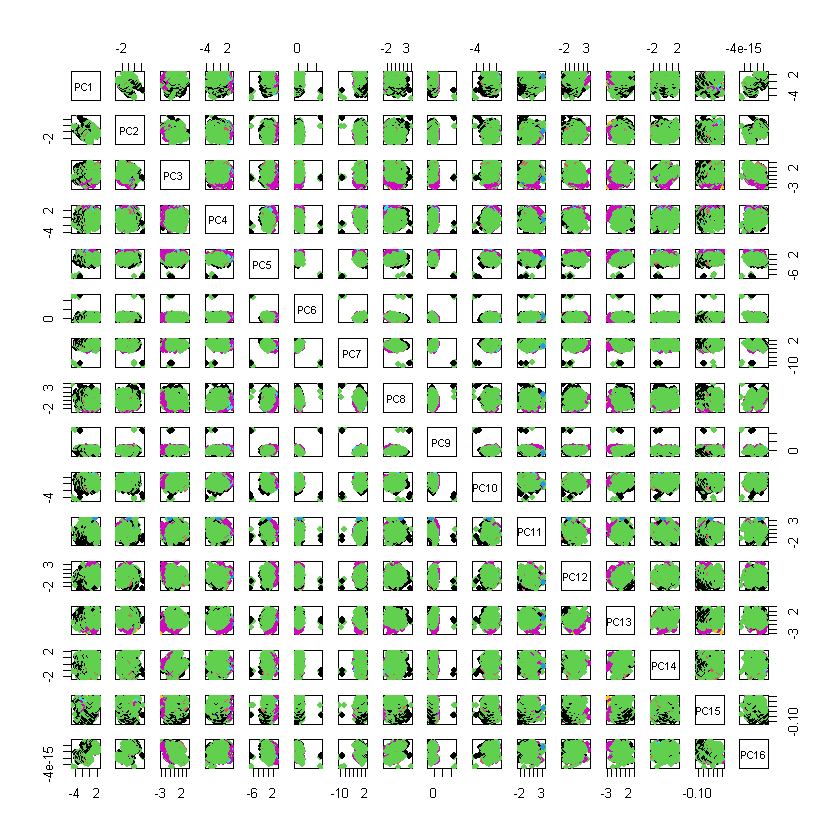

In [26]:
#Plot PCA
plot(as.data.frame(pca.mascotas$x), col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)

Parece que encontramos relaciones interesantes!!!

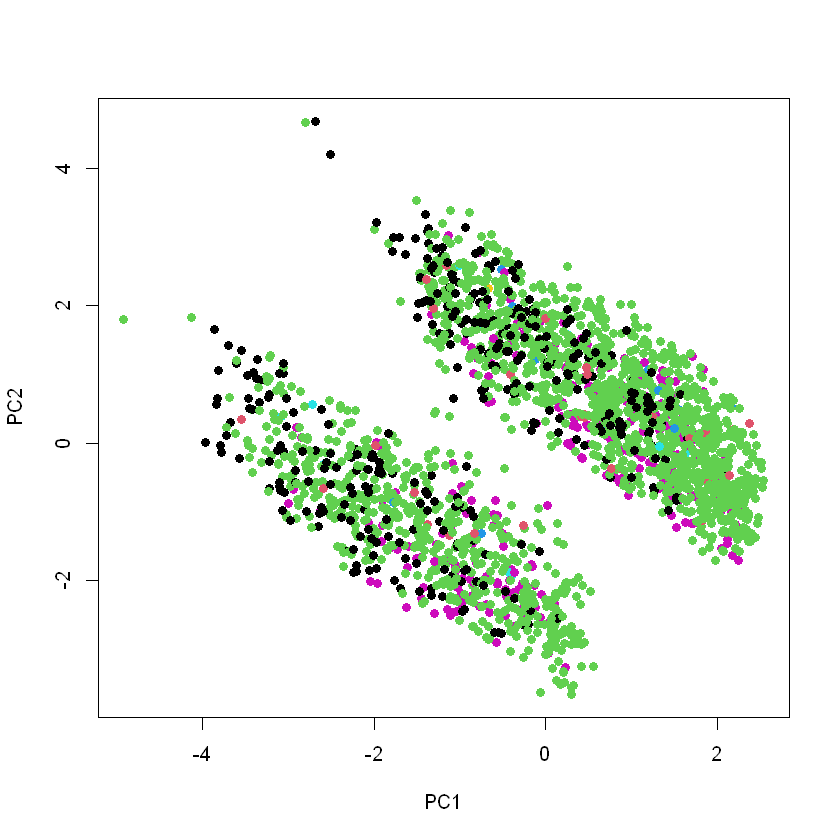

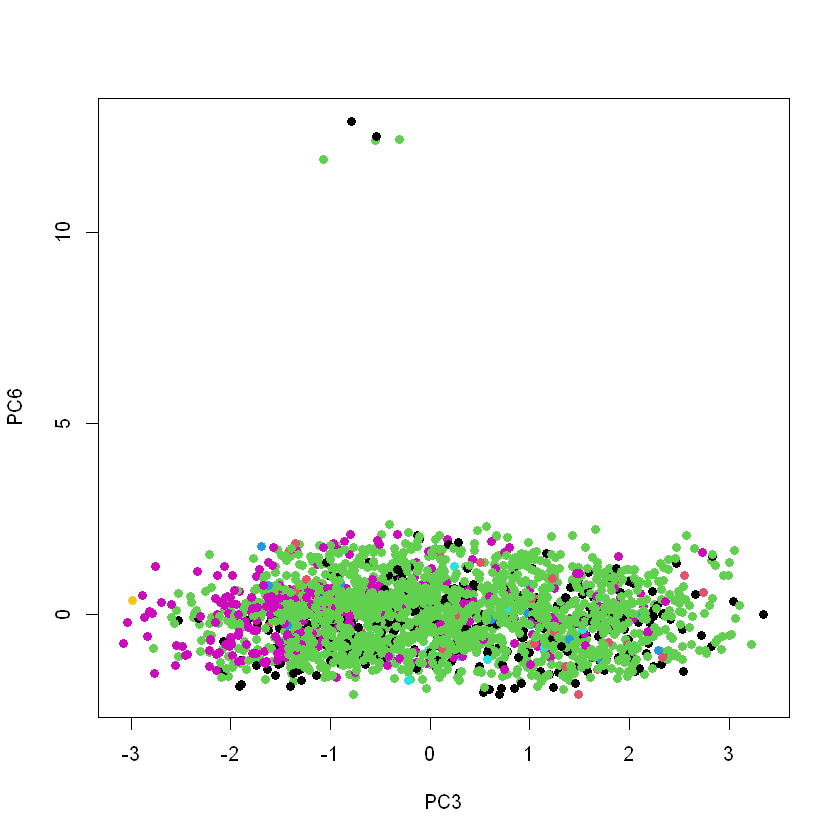

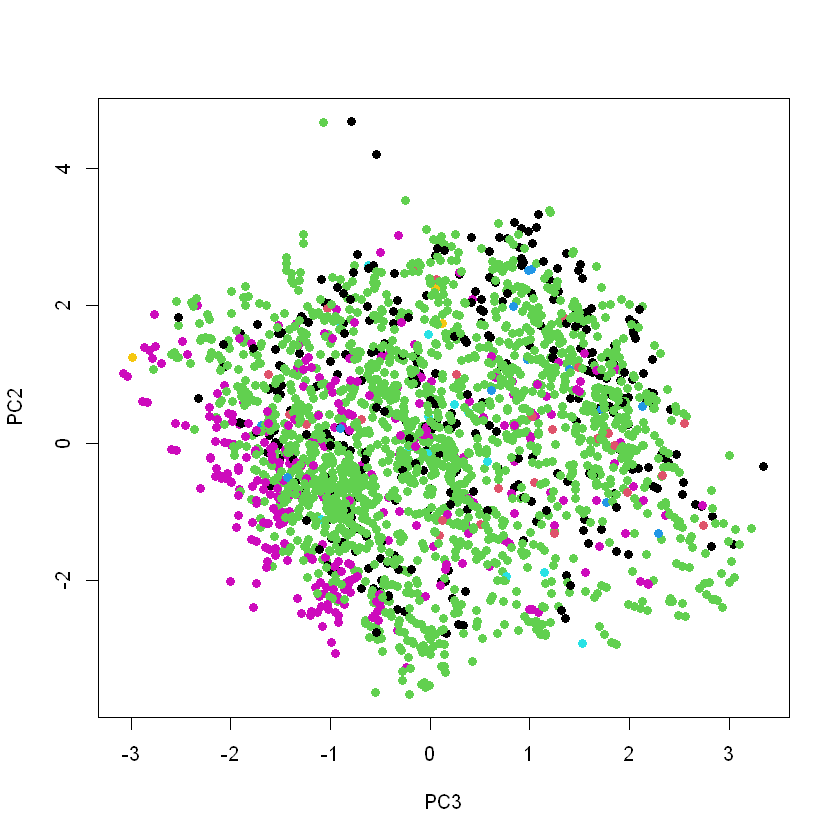

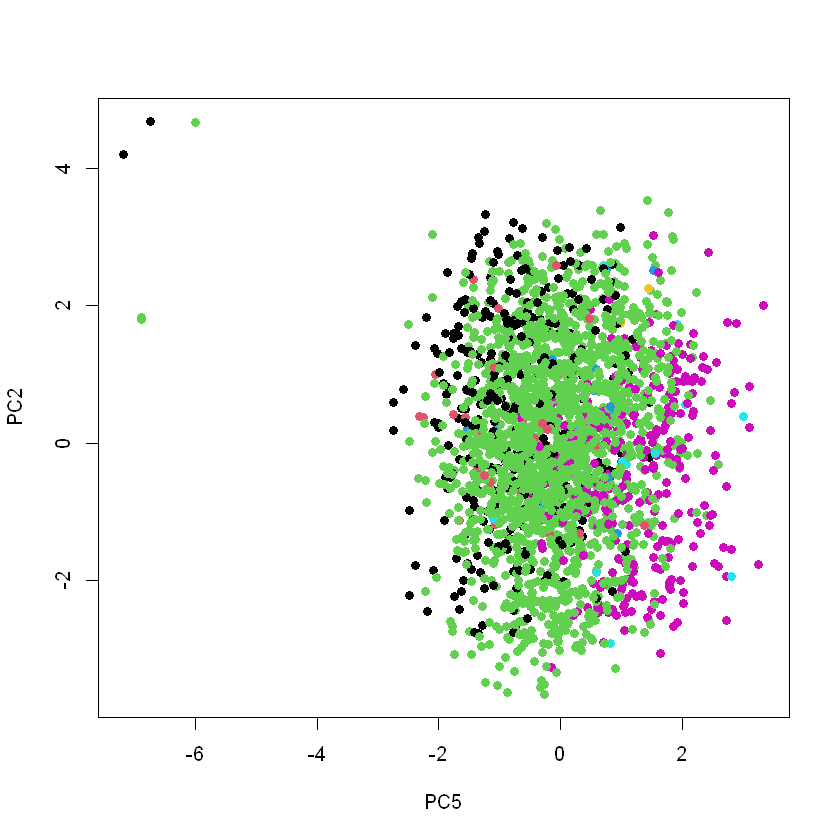

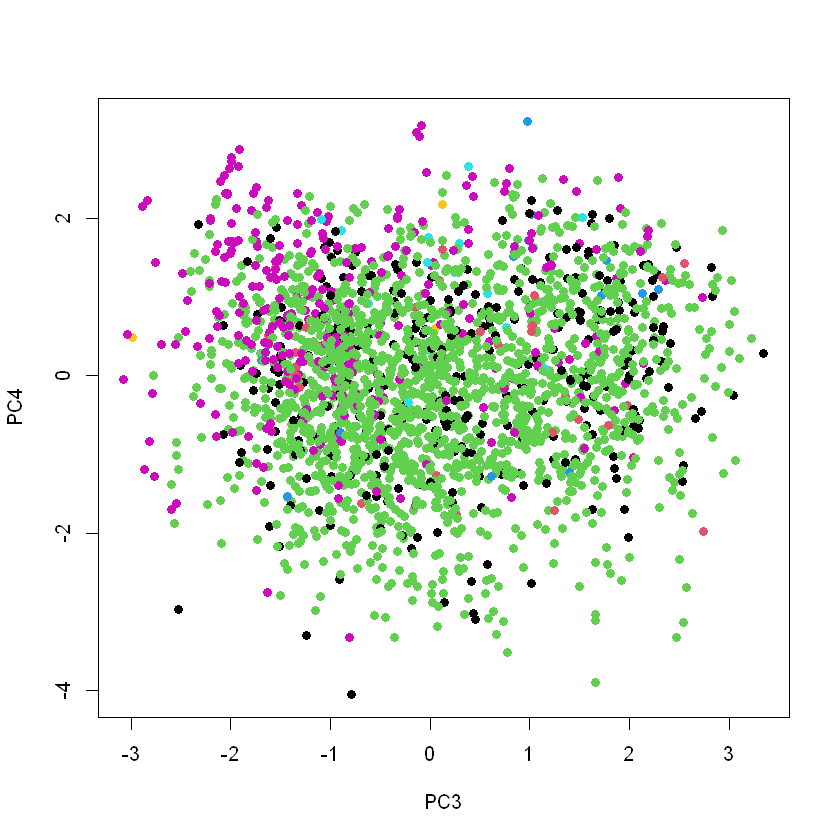

In [27]:
plot(pca.mascotas$x[,1:2], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(3,6)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(3,2)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(5,2)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(3,4)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)

Parecería ser que hay algunas solicitudes que se comportan como outliers

Vamos a ver ahora qué podemos hacer con la selacción de variables. Voy a buscar todo el código del TP 2


In [24]:
# install.packages("randomForest", dependencies = T)
library(randomForest)
# install.packages("kernlab", dependencies = T)
library(kernlab)

Warning message:
"package 'randomForest' was built under R version 4.2.2"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin



Attaching package: 'kernlab'


The following object is masked from 'package:ggplot2':

    alpha




In [22]:
#---------------------------------------------------------------------------
#random forest error estimation (OOB) for greedy search
#---------------------------------------------------------------------------
rf.est <- function(x.train,y,equalize.classes=TRUE,tot.trees=500,mtry=0)
{
	if(mtry<1) mtry<-floor(sqrt(dim(x.train)[2]))
	prop.samples<-table(y)
	if(equalize.classes) prop.samples<-rep(min(prop.samples),length(prop.samples))
	return( randomForest(x.train,y,mtry=mtry,ntree=tot.trees,sampsize=prop.samples)$err.rate[tot.trees] )
}


#---------------------------------------------------------------------------
#random forest ranking method for rfe.
#---------------------------------------------------------------------------
imp.rf <- function(x.train,y,equalize.classes=TRUE,tot.trees=500,mtry=0)
{
	if(mtry<1) mtry<-floor(sqrt(dim(x.train)[2]))
	prop.samples<-table(y)
	if(equalize.classes) prop.samples<-rep(min(prop.samples),length(prop.samples))
	
	m.rf<-randomForest(x.train,y,ntree=tot.trees,mtry=mtry,sampsize=prop.samples,importance=TRUE)
	imp.mat<-importance(m.rf)
	imp.col<-dim(imp.mat)[2]-1
	rank.list<-sort(imp.mat[,imp.col],decreasing=FALSE,index=T)
	return(list(feats=rank.list$ix,imp=rank.list$x))
}

forward.ranking <- function(x,y,method,verbosity=0,... )
{

	max.feat<-dim(x)[2] #Cantidad de variables (digamosle k)
	num.feat<-1 #Cantidad inicial de variables
	list.feat<-1:max.feat #Sequencia de 1 a k donde guardo las variables mas importantes

	#ranking inicial: elijo la variable con menor error de prediccion
  x.train<-matrix(0,dim(x)[1],1) #Columna de 0 de tamaño n 
	class.error<-double(max.feat) #Aca voy a guardar todos los errores
	#para cada i, creo el dataset con esa variable sola, entreno un modelo y le mido el error, que lo guardo en class.error[i]
	for(i in 1:max.feat){
		x.train[,1]<-x[,i] #Lleno la variable donde guardo los datos de train con la columna de la variable que me importa
		class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) ) # Entreno un modelo y guardo el error
	}
	#guardo la variable con minimo error como primera. Guardo una lista keep.feat con las que me quedan para seguir eligiendo.
	list.feat[1]<-which.min(class.error) #Aca quedan ordenadas por importancia
	keep.feat<-sort(class.error,decreasing=FALSE,index=T)$ix[-1] #Aca quedan las que tengo que probar
	#armo un dataset con las variables que ya elegi, para ir agregando en cada paso.
	x.prev<-x.train[,1]<-x[,list.feat[1]] #En x.train pongo la variable importante como columna, y guardo esa columna como variable en x.prev

	if(verbosity>1) cat("\nFirst feature: ",list.feat[1],"\n")

    #loop principal. A cada paso agrego todas las variables disponibles, de a una, le mido el error y me quedo con la de minimo error. Hasta llegar a meter todas.
	while(num.feat<max.feat){
    #class.error guarda el error de cada modelo. Son max.feat-num.feat modelos.
		class.error<-double(max.feat-num.feat) #Voy sacando features
		#para cada variable que me queda, la agrego al dataset del paso anterior, entreno el modelo y le mido el error.
		for(i in 1:(max.feat-num.feat)){
			x.train<-cbind(x.prev,x[,keep.feat[i]]) #En x.prev estaban las variables que me servian, le agrego como columna la nueva variable 
			class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) )
		}
		if(verbosity>2) cat("\nFeatures:\n",keep.feat,"\nErrors:\n",class.error)
		#me quedo con el modelo de minimo error, guardo ese feature en la lista de las elegidas, lo saco de la lista de las que quedan, y actualizo el dataset de partida de la iteracion.
		best.index<-which.min(class.error)
		list.feat[num.feat+1]<-keep.feat[best.index]
		if(verbosity>1) cat("\n---------\nStep ",1+num.feat,"\nFeature ",best.index)

		keep.feat<-keep.feat[-best.index]
		if(verbosity>2) cat("\nNew search list: ",keep.feat)
		num.feat<-num.feat+1
		x.prev<-x[,list.feat[1:num.feat]] #Como en list.feat estaban las que me servian, ordenadas, las guardo en x.prev
	}

	search.names<-colnames(x)[list.feat]
	#le asigno a cada feature una importacia proporcional al orden en que lo seleccionamos
	imp<-(max.feat:1)/max.feat
	names(imp)<-search.names

	if(verbosity>1){
		cat("\n---------\nFinal ranking ",num.feat," features.")
		cat("\nFeatures: ",search.names,"\n")
	}

 	return( list(ordered.names.list=search.names,ordered.features.list=list.feat,importance=imp) )

}

backward.ranking <- function(x,y,method,... )
{

	max.feat<-dim(x)[2] #Cantidad de variables (digamosle k)
	list.feat<-1:max.feat #Sequencia de 1 a k donde guardo las variables mas importantes
	num.feat<-0 #Cantidad de variables que saque (ninguna)
	keep.feat <- 1:max.feat #Guardo las variables que me van quedando

	#ranking inicial: entreno un modelo completo y le mido el error
  x.train<-x #El primer entrenamiento se hace con todo el dataset
	previous.error <- do.call(method, c(list(as.matrix(x.train), y), list(...)) ) # Entreno un modelo completo y guardo el error

    class.error<-double(max.feat)
    for(i in 1:max.feat){
		x.train<-x[,-i] #En la primer iteracion saco una sola variable
		class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) )
        class.error[i] <- abs(class.error[i] - previous.error) #Diferencia con el error anterior
    }


	#Saco la variable que menos error me agrego (no era tan importante). Guardo una lista keep.feat con las que me quedan para seguir sacando.
	min.error.index <- which.min(class.error) #La que menor error deja es la menos importante (no afecto que la saque) 
    previous.error <- class.error[min.error.index] #El modelo adecuado es este
    list.feat[1]<-min.error.index #Aca quedan ordenadas por menor importancia
	keep.feat<-keep.feat[-min.error.index] #Aca quedan las que tengo que probar
	#Saco del dataset las variables que ya probe
    num.feat<-num.feat+1

    #loop principal. A cada paso saco variables, de a una, le mido el error y elimino la de minimo error. Hasta que me quede la mas importante.
	while(num.feat < max.feat -1 ){
    #class.error guarda el error de cada modelo. Son max.feat-num.feat modelos.
		class.error<-double(max.feat-num.feat) #Voy sacando features
		#para cada variable que me queda, la saco del dataset, entreno el modelo y le mido el error.
		for(i in 1:(max.feat-num.feat)){
			x.train<-x[,keep.feat[-i]] #Construyo el conjunto de train usando las feats que me interesan
			class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) )
			class.error[i] <- abs(class.error[i] - previous.error) #Diferencia con el error anterio
		}
		#me quedo con el modelo de minimo error, guardo ese feature en la lista de las elegidas, lo saco de la lista de las que quedan, y actualizo el dataset de partida de la iteracion.
		min.error.index<-which.min(class.error)
		previous.error <- class.error[min.error.index]
		list.feat[num.feat+1]<-keep.feat[min.error.index]
		keep.feat<-keep.feat[-min.error.index]

		num.feat<-num.feat+1
	}

	list.feat[num.feat+1] <- keep.feat[1] #Me quedaba una feature sin probar
	list.feat <- rev(list.feat) #Las variables mas importantes quedaron al final de la lista
	search.names<-colnames(x)[list.feat]
	#le asigno a cada feature una importacia proporcional al orden en que lo seleccionamos
	imp<-(max.feat:1)/max.feat
	names(imp)<-search.names

 	return( list(ordered.names.list=search.names,ordered.features.list=list.feat,importance=imp) )

}

no.parametrico <- function(x,y){
  var.count <- dim(x)[2]
  stat <- c()
  for (i in 1:var.count){
    var<-x[,i]
    stat[i] <- kruskal.test(var,y)$statistic
  }
  ordered.vars <- order(stat, decreasing=T) 
  var.names<-colnames(x)[ordered.vars]
  imp<-(var.count:1)/var.count
	names(imp)<-var.names
  return( list(ordered.names.list=var.names,ordered.features.list=ordered.vars,importance=imp) )

}

rfe <- function(x,y,method,...){
  p <- dim(x)[2]
  F <- 1:p #Todas mis variables
  R <- c()
  for(i in 1:p){
    #Truco que me sirvio para entender que estoy haciendo al construir el dataset de entrenamiento:
    #F es una lista de indices (guarda todas las variables que voy a usar)
    #En lugar de hacer algun truco raro para llevar registro de que voy eliminando, reconstruyo el dataset de entrenamiento con los indices
    x.train <- as.matrix(x[,F]) #Tengo que pasarlo a matrix porque sino tengo problemas con las dimensiones
    values <- do.call(method, c(list(x.train, y), list(...)) ) 
    fIndex <- values$feats[1] #Obtengo la variable menos importante
    R[p-i+1] <- F[fIndex] #Agrego la variable menos importante
    F <- F[-fIndex] #Elimino la variable de mi lista de variables
  }
  var.names<-colnames(x)[R]
  imp<-(p:1)/p
	names(imp)<-var.names
  return( list(ordered.names.list=var.names,ordered.features.list=R,importance=imp) )

}

Vamos a hacer los análisis usando Random Forest

In [30]:
#Estado es la columna 6, tambien vamos a ignorar el ID
mascotasFiltradas[,6] <- as.factor(mascotasFiltradas[,6])
FORW.rf <-forward.ranking(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6],method="rf.est" ,tot.trees=100,equalize.classes=F)
BACK.rf <-backward.ranking(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6],method="rf.est" ,tot.trees=100,equalize.classes=F)
noP <- no.parametrico(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6])
RFE.rf <- rfe(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6],method="imp.rf",tot.trees=100,equalize.classes=F)

In [31]:
FORW.rf
BACK.rf
noP 
RFE.rf

$ordered.names.list
 [1] "Sexo"             "Campania"         "Producto"         "Fecha.Nacimiento"
 [5] "Fecha"            "Provincia"        "Vendedor"         "Raza.Mascota"    
 [9] "Medio.Pago"       "Agencia"          "Importe"          "Tipo.Mascota"    
[13] "Sexo.Mascota"     "Mascota.Fec.Nac" 

$ordered.features.list
 [1]  5  7  8  6  1  3  4 13 10  2  9 11 14 12

$importance
            Sexo         Campania         Producto Fecha.Nacimiento 
      1.00000000       0.92857143       0.85714286       0.78571429 
           Fecha        Provincia         Vendedor     Raza.Mascota 
      0.71428571       0.64285714       0.57142857       0.50000000 
      Medio.Pago          Agencia          Importe     Tipo.Mascota 
      0.42857143       0.35714286       0.28571429       0.21428571 
    Sexo.Mascota  Mascota.Fec.Nac 
      0.14285714       0.07142857

$ordered.names.list
 [1] "Fecha.Nacimiento" "Fecha"            "Provincia"        "Importe"         
 [5] "Sexo"             "Vendedor"         "Tipo.Mascota"     "Raza.Mascota"    
 [9] "Agencia"          "Producto"         "Mascota.Fec.Nac"  "Campania"        
[13] "Sexo.Mascota"     "Medio.Pago"      

$ordered.features.list
 [1]  6  1  3  9  5  4 11 13  2  8 12  7 14 10

$importance
Fecha.Nacimiento            Fecha        Provincia          Importe 
      1.00000000       0.92857143       0.85714286       0.78571429 
            Sexo         Vendedor     Tipo.Mascota     Raza.Mascota 
      0.71428571       0.64285714       0.57142857       0.50000000 
         Agencia         Producto  Mascota.Fec.Nac         Campania 
      0.42857143       0.35714286       0.28571429       0.21428571 
    Sexo.Mascota       Medio.Pago 
      0.14285714       0.07142857

$ordered.names.list
 [1] "Fecha"            "Medio.Pago"       "Fecha.Nacimiento" "Campania"        
 [5] "Mascota.Fec.Nac"  "Producto"         "Importe"          "Sexo"            
 [9] "Raza.Mascota"     "Vendedor"         "Provincia"        "Tipo.Mascota"    
[13] "Sexo.Mascota"     "Agencia"         

$ordered.features.list
 [1]  1 10  6  7 12  8  9  5 13  4  3 11 14  2

$importance
           Fecha       Medio.Pago Fecha.Nacimiento         Campania 
      1.00000000       0.92857143       0.85714286       0.78571429 
 Mascota.Fec.Nac         Producto          Importe             Sexo 
      0.71428571       0.64285714       0.57142857       0.50000000 
    Raza.Mascota         Vendedor        Provincia     Tipo.Mascota 
      0.42857143       0.35714286       0.28571429       0.21428571 
    Sexo.Mascota          Agencia 
      0.14285714       0.07142857

$ordered.names.list
 [1] "Fecha.Nacimiento" "Fecha"            "Medio.Pago"       "Vendedor"        
 [5] "Provincia"        "Importe"          "Campania"         "Sexo"            
 [9] "Raza.Mascota"     "Producto"         "Mascota.Fec.Nac"  "Tipo.Mascota"    
[13] "Agencia"          "Sexo.Mascota"    

$ordered.features.list
 [1]  6  1 10  4  3  9  7  5 13  8 12 11  2 14

$importance
Fecha.Nacimiento            Fecha       Medio.Pago         Vendedor 
      1.00000000       0.92857143       0.85714286       0.78571429 
       Provincia          Importe         Campania             Sexo 
      0.71428571       0.64285714       0.57142857       0.50000000 
    Raza.Mascota         Producto  Mascota.Fec.Nac     Tipo.Mascota 
      0.42857143       0.35714286       0.28571429       0.21428571 
         Agencia     Sexo.Mascota 
      0.14285714       0.07142857

Todos los métodos coinciden en que la fecha de emisión de la solicitud es importante para determinar el estado. Esperaba que el medio de pago juege un rol más importante del que se ve, pero no parece ser así. Tampoco lo es la raza de la mascota, pero sí la fecha de nacimiento del que contrata el seguro. Quizás esto indique que la mayoría de los problemas con las solicitudes de seguros están dadas por el que contrata la póliza y no por el asegurado (la mascota en este caso).

En todos menos el test no paramétrico la provincia está entre los primeros 6. No me sorprende, porque la mayoría de las solicitudes cerradas son de Buenos Aires y de Capital Federal.

Pasemos ahora a buscar clusters. Recordemos lo hecho en el TP 3

In [26]:
#Funcion para generar n datasets con distribuciones uniformes para usar de referencia
crea.referencias <- function(original.dataset, n){
    #Dimensiones del dataset
    rows <- dim(original.dataset)[1]
    cols <- dim(original.dataset)[2]

    #Calculamos la pca
    pca <- prcomp(original.dataset)
    #Obtenemos los rangos de las variables, range me da el minimo y el maximo
    rangos <- apply(pca$x, 2, range)

    #Dataset de referencia, tiene que ser una lista para soportar las multiples dimensiones
    reference.datasets <- list()

    #Generamos los n datasets de referencia
    for(i in 1:n){
        #Generamos un dataset de referencia vacio
        reference.dataset <- c()

        #Generamos las columnas de uno de los datasets
        for(j in 1 : min(rows, cols)){
			    uniformColumn = runif(rows, rangos[1, j], rangos[2, j])
			    reference.dataset = cbind(reference.dataset, uniformColumn)
		    }	
        
        #Añadimos el dataset de referencia a la lista
        reference.datasets[[i]] <- reference.dataset
    }

    return (reference.datasets)
}


gap.statistic <- function(dataset, maxK, B){
    #Vector Wkb de las referencias
    Wkb.star <- double(maxK)
    #Vetor para almacenar el gap
    gap <- double(maxK)
    #Vector para las desviaciones estandar
    sk <- double(maxK)
    uniform.references <- crea.referencias(dataset, B)

    for(k in 1:maxK){
        #Medida de dispersion de cluster de tamaño k
        Wk <- kmeans(dataset, k, nsta = 10)$tot.withinss
        #Busco las medidas de dispersion de hacer kmeans de cada referencia
        for(b in 1:B){
            Wkb.star[b] <- kmeans(uniform.references[[b]],k)$tot.withinss
        }
        #Obtenemos la gap statistic
        gap[k] <- (1/B) * sum(log(Wkb.star)) - log(Wk)
        lhat <- (1/B) * sum(log(Wkb.star))
        sd.k <- sqrt(1/B * sum((log(Wkb.star) - lhat)^2))
        sk[k] <- sd.k * sqrt(1 + 1/B)
    }

    #Buscamos la cantidad de clusters adecuada según la desigualdad
    suggested.clusters <- 2
	  while(suggested.clusters < maxK && 
	      gap[suggested.clusters] < gap[suggested.clusters + 1] - sk[suggested.clusters + 1]){
          
		suggested.clusters = suggested.clusters + 1
	  }
    return(suggested.clusters)
}

#Funcion magica provista por Pablo Granitto
stability.score <- function(n, ind1, ind2, cc1, cc2){
    v1<-v2<-rep(0,n)
    v1[ind1]<-cc1+5
    v2[ind2]<-cc2+5
    #creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada clustering
    a <- sqrt(v1%*%t(v1))
    m1 <- a / -a + 2*(a==round(a))
    m1[is.nan(m1)]<- 0
    a <- sqrt(v2%*%t(v2))
    m2 <- a / -a + 2*(a==round(a))
    m2[is.nan(m2)] <- 0
    #calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
    validos <- sum(v1*v2>0)
    score <- sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
    return(score)
}

stability.method <- function(dataset, k, nRep){
    #Cantidad de filas
    rows <- dim(dataset)[1]

    #Generamos nRep muestras del dataset subsampleadas al 90%
    subsamples <- list()
    for(i in 1:nRep){
        subsamples[[i]] <- sample(rows, rows*0.9)
    }

    #Calculamos el valor de estabilidad segun la cantidad de clusters
    stability <- list()
    stability.mean <- c()
    for(cluster.number in 2:k){
        #Calculamos el clustering para cada subsample
        kmeans.subsamples <- list()
        for(r in 1:nRep){
            kmeans.subsamples[[r]] <- kmeans(dataset[subsamples[[r]], ], cluster.number)$cluster
        }

        #Calculamos la estabilidad comparando cada referencia creada
        stability.scores <- c()
        for(ind1 in 1 : (nRep - 1)){
            for(ind2 in (ind1 + 1) : nRep){
                stability.scores <- c(stability.scores, stability.score(rows, subsamples[[ind1]], subsamples[[ind2]], kmeans.subsamples[[ind1]], kmeans.subsamples[[ind2]]))
            }
        }
        stability[[cluster.number]] <- stability.scores
        #Sacamos la media de los scores de estabilidad para obtener la cantidad preferida de clusters (tambien se puede hacer viendo histogramas)
        stability.mean <- c(stability.mean, mean(stability.scores))
    }
    l <- list(stability = stability, mean.stability = stability.mean)
    return(l) 
}

In [36]:
gap <- gap.statistic(mascotasFiltradas[,-c(6,1)], 5, 1000)

In [ ]:
gap

Por lo que veo, gap recomienda 4 clusters. Voy a usar clustering divisivo para ver qué cosa recuperar.


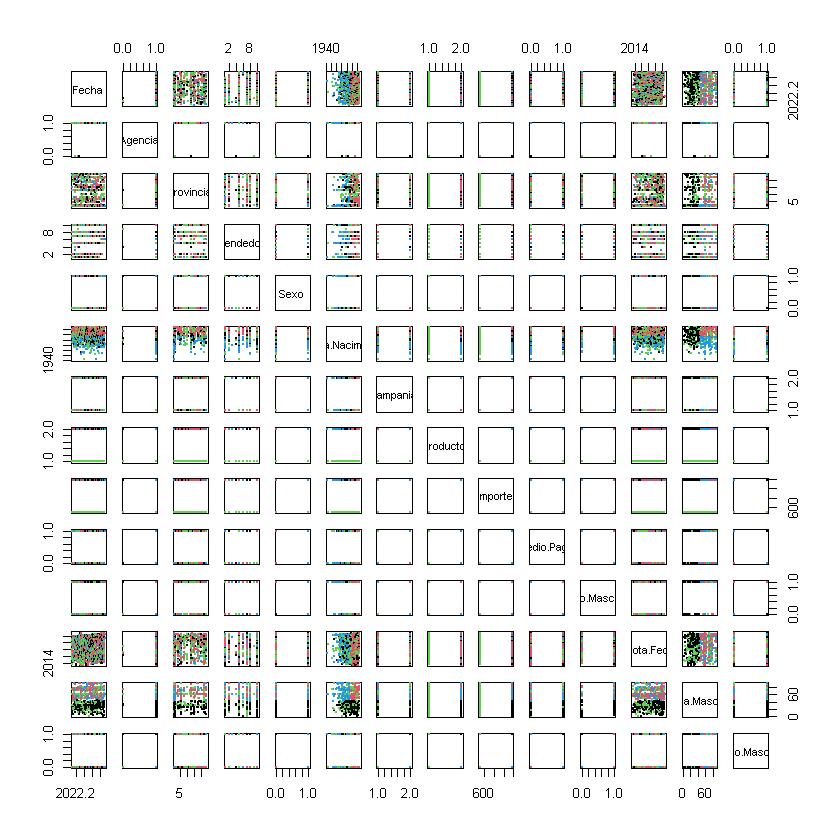

In [20]:
#kmeans con 4 clusters
clusters <- kmeans(mascotasFiltradas[,-c(6,1)], 4)
#Plot de los clusters
plot(mascotasFiltradas[,-c(1,6)], col = clusters$cluster, pch = 20, cex = 0.5)

In [27]:
table(clusters$cluster, mascotasFiltradas$Estado)

   
      1   2   3   4   5   6   7
  1  41   3 376   2   0  67   0
  2 112  11 488   8   8 115   0
  3 149   8 547   2   7 105   0
  4  32   9 269   3   0  26   3

No parece haber nada en esta situación. Se me ocurrió probarlo con los estados, porque quizás haya algo interesante. Pero no, no hay nada relevante (hasta donde yo llego a entender, puede ser que sea el resultado de alguna relación mucho más profunda entre los datos). 

¿Qué pasa si lo hago con la PCA?

In [28]:
#Gap with pca
pca <- prcomp(mascotasFiltradas[,-c(6,1)], scale = TRUE)
gapPCA <- gap.statistic(pca$x, 5, 1000)


ERROR: Error in gap.statistic(pca$x, 5, 1000): could not find function "gap.statistic"


In [49]:
gapPCA

[1] 2

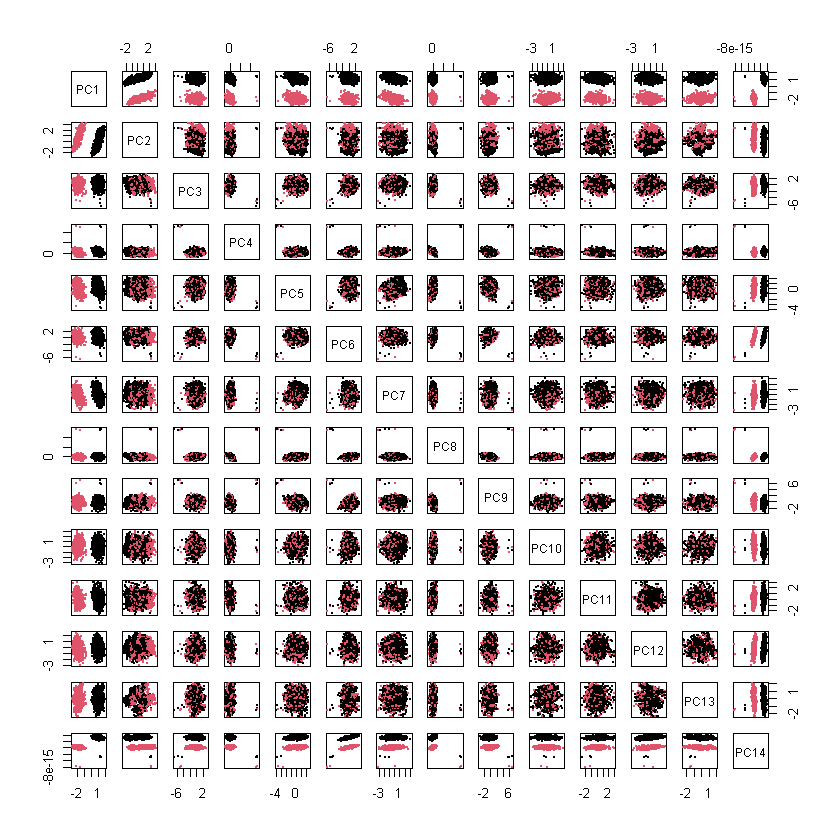

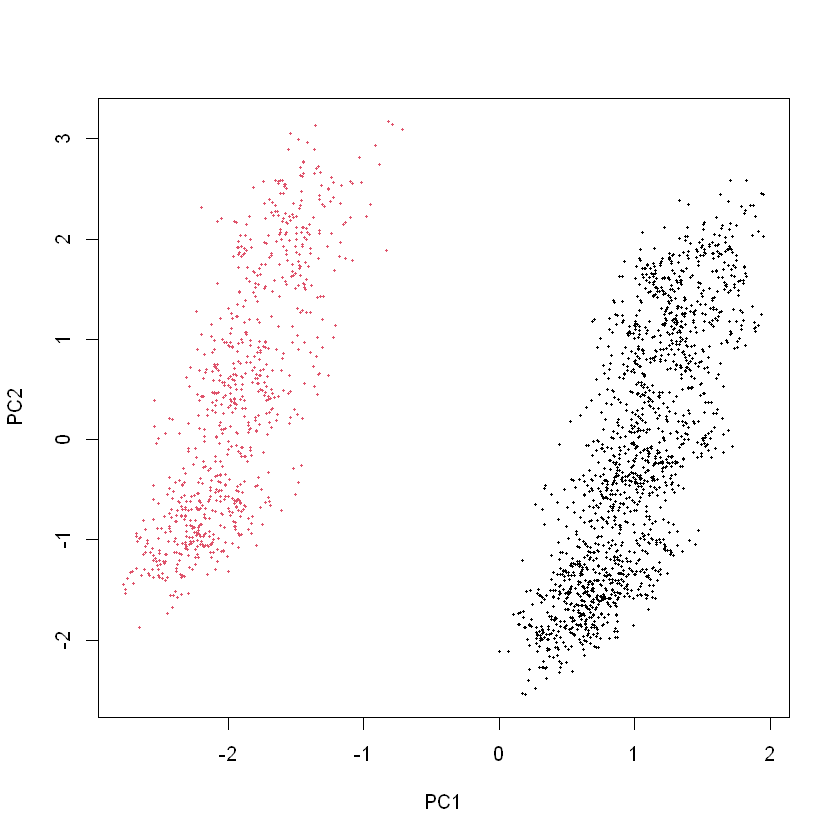

In [33]:
pcaXdf <- as.data.frame(pca$x)
clusters <- kmeans(pcaXdf, 2)
plot(pcaXdf, col = clusters$cluster, pch = 20, cex = 0.5)
plot(pcaXdf[,1:2], col = clusters$cluster, pch = 20, cex = 0.5)

In [36]:
table(clusters$cluster, mascotasFiltradas$Tipo.Mascota)
table(clusters$cluster, mascotasFiltradas$Medio.Pago) 
table(clusters$cluster, mascotasFiltradas$Sexo)
table(clusters$cluster, mascotasFiltradas$Importe)
table(clusters$cluster, mascotasFiltradas$Campania)
table(clusters$cluster, mascotasFiltradas$Producto)

   
       0    1
  1  387 1186
  2  266  552

   
      0   1
  1 686 887
  2 342 476

   
       0    1
  1 1061  512
  2  641  177

   
     575  744
  1    0 1573
  2  818    0

   
       1    2
  1  531 1042
  2  285  533

   
       1    2
  1    0 1573
  2  818    0

Aparecen dos clusters bien marcados! Separa bien el producto y el importe. Esto sucede así acá porque el importe no varió en el año 2022, pero sí en años anteriores. Realmente no es de mucha ayuda, pero bueno, es un dato interesante.

Por último, vamos a usar el código del TP 4 para entrenar clasificadores.

In [14]:
library("e1071")

Warning message:
"package 'e1071' was built under R version 4.2.2"


In [57]:
library("adabag")

Warning message:
"package 'adabag' was built under R version 4.2.2"
Loading required package: foreach

Warning message:
"package 'foreach' was built under R version 4.2.2"
Loading required package: doParallel

Warning message:
"package 'doParallel' was built under R version 4.2.2"
Loading required package: iterators

Warning message:
"package 'iterators' was built under R version 4.2.2"
Loading required package: parallel



In [17]:
table(mascotasFiltradas$Estado)
dim(mascotasFiltradas)


   1    2    3    4    5    6    7 
 334   31 1680   15   15  313    3 

[1] 2391   16

Claramente las clases están desbalanceadas, así que hacer k-folds no va a ser efectivo. Tenemos que hacer stratified k-folds.

Según la documentación de caret: `createFolds can be used to generate balanced cross–validation groupings from a set of data.`

In [15]:
library(caret)
library(rpart)

Warning message:
"package 'caret' was built under R version 4.2.2"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Loading required package: lattice



In [16]:
mascotasFiltradas$Estado <- as.factor(mascotasFiltradas$Estado)
folds <- createFolds(mascotasFiltradas$Estado, k = 5, list = TRUE, returnTrain = TRUE)

In [ ]:
errors_estado_boosting <- double(20)

for(k in 2:20){
    errors_iteration <- double(5)
    message("Entreno con profundidad = ", k)
    for(i in 1:5){
        trainData <- mascotasFiltradas[folds[[i]], ]
        testData <- mascotasFiltradas[-folds[[i]], ]
        # Entrenamos
        message("Entreno con k = ", k, " y fold = ", i)
        estado.Adaboost <- boosting(Estado ~ ., data = trainData, mfinal = 200, coef="Freund", control = rpart.control(maxdepth = k)) 
        message("Predigo con k = ", k, " y fold = ", i)
        errors_iteration[i] <- predict(estado.Adaboost, newdata = testData, type = "class")$error
    }
    errors_estado_boosting[k] <- mean(errors_iteration)
}

Tuve que arrancar en profundidad 2 porque la profundidad 1 no terminaba nunca de correr. 

[1] 0.2931758 0.2902495 0.2898408 0.2877443 0.2835620 0.2806340 0.2793779
 [8] 0.2806340 0.2810524 0.2789612 0.2789603 0.2810463 0.2793796 0.2823085
[15] 0.2789577 0.2827304 0.2781261 0.2814690 0.2789559

[1] 17

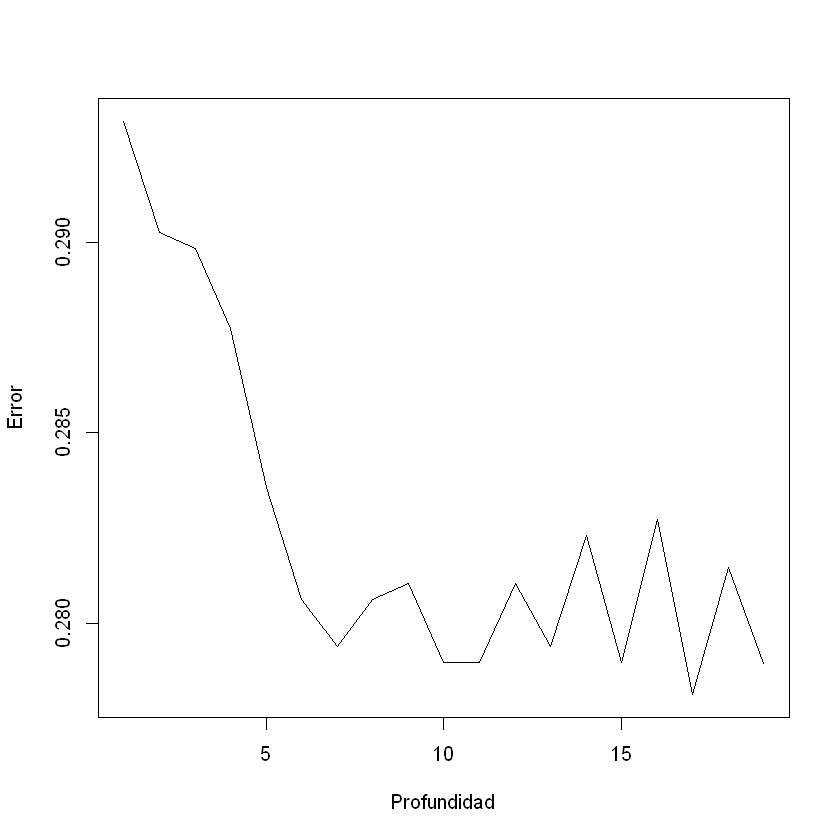

In [29]:
errors_estado_boosting[2:20]
which.min(errors_estado_boosting[2:20])
#plot de los errores
plot(errors_estado_boosting[2:20], type = "l", xlab = "Profundidad", ylab = "Error")

El error se encuentra alrededor de 0.28, sin importar la profundidad de los árboles

Probemos ahora con random forest

In [34]:
dim(mascotasFiltradas)

[1] 2391   16

In [ ]:
cant.vars <- c() #Cantidad de variables a usar en cada paso
v <- 15 #Tenemos 16 variables menos el estado, o sea, 15
while(v >= 1){
    cant.vars <- c(cant.vars, v)
    v <- floor(v/2)
}
errors_rf <- double(length(cant.vars)) #Lista de errores
for (k in 1:length(cant.vars)){
    error_k <- double(5) #Vector de errores para el k actual
    for(i in 1:5){
        rf <- randomForest(Estado ~ . , data = mascotasFiltradas, mtry = cant.vars[k], ntree = 1000) #1000 es el número mágico de árboles
        # miss <- rf$confusion[1,2] + rf$confusion[2,1] #Cantidad de errores
        # print(rf$confusion)
        # error_k[i] <- miss/dim(mascotasFiltradas)[1] #Cantidad total
        #OOB error
        error_k[i] <- rf$err.rate[1000]
    }
    errors_rf[k] <- mean(error_k) #Guardo los errores para el k actual
}

In [42]:
cant.vars

[1] 15  7  3  1

[1] 0.2355500 0.2318695 0.2412380 0.2973651


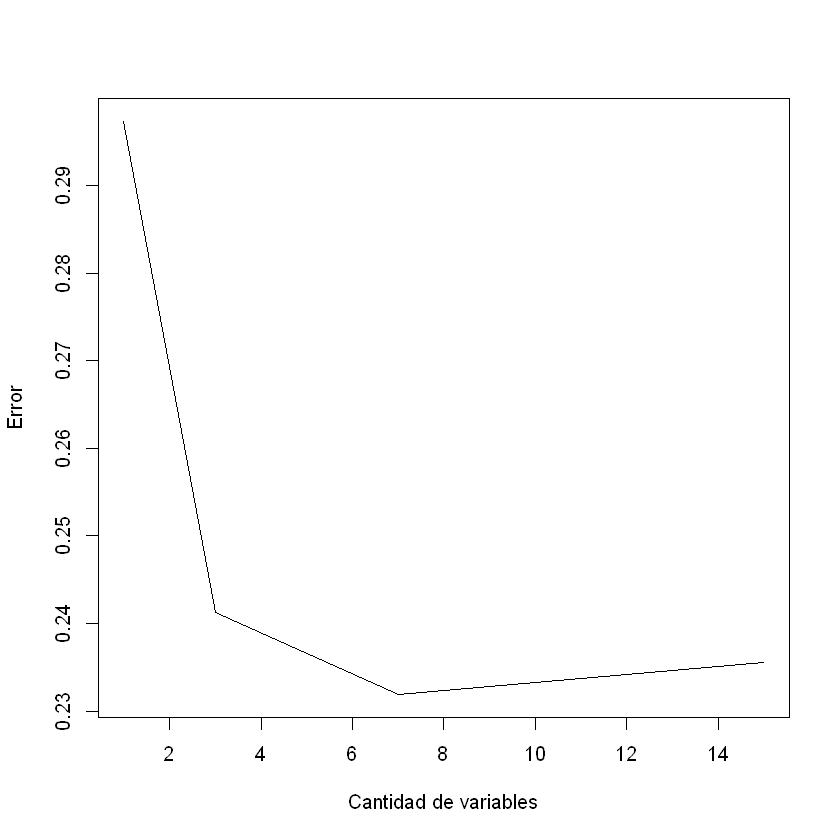

In [44]:
print(errors_rf)
#plot de los errores
plot(x=cant.vars, y=errors_rf , type = "l", xlab = "Cantidad de variables", ylab = "Error")

7 variables parece ser la cantidad óptima, la mitad de las variables. El error fue apenas menor que en boosting.

Por último, veamos cómo se comportan SVM con kernel radial y polinomial

In [ ]:
# Para guardar los errores
errors_svm_rbf <- c(21)

#5-fold cross-validation
for(k in (-10):10){
    message("Iteracion k = ", k)
    errors <- double(5)
    g <- 10 ^ (-k)
    c <- 10 ^ (k)
    for(i in 1:5){
        # Generamos los conjuntos de test y train
        trainData <- mascotasFiltradas[folds[[i]], ]
        testData <- mascotasFiltradas[-folds[[i]], ]
        #Entrenamos esta vez usando un kernel RBF
        suppressWarnings(svmModel <- svm(Estado ~ ., data = trainData, scale = TRUE, type = 'C-classification', kernel = "radial", gamma = g, cost = c))
        svmPredict <- predict(svmModel, newdata = testData)
        #Calculate error
        errors[i] <- sum(svmPredict != testData$Estado)/length(svmPredict)
    }
    errors_svm_rbf[k+11] <- mean(errors)
}


[1] "Errores en cada iteración:"
 [1] 0.2973597 0.2973597 0.2973597 0.2973597 0.2973597 0.2973597 0.2973597
 [8] 0.2973597 0.2973597 0.2973597 0.2835704 0.3304258 0.2935940 0.2973597
[15] 0.2973597 0.2973597 0.2973597 0.2982018 0.2990308 0.2973597 0.6821170


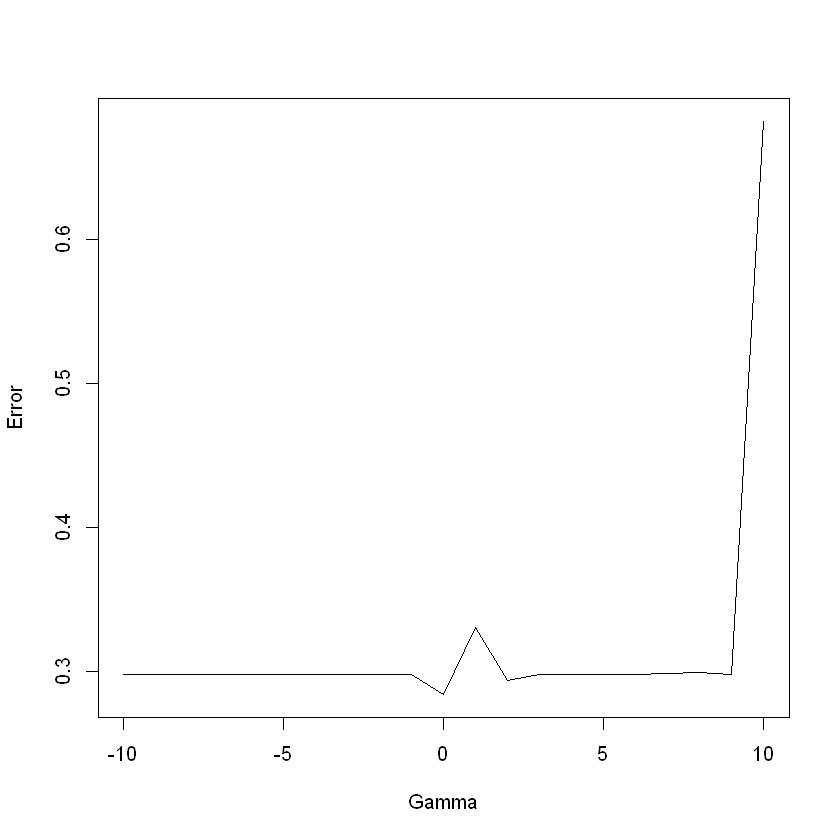

In [28]:
print("Errores en cada iteración:")
print(errors_svm_rbf)

#plot de los errores 
plot(x = (-10):10, y = errors_svm_rbf, type = "l", xlab = "Gamma", ylab = "Error")

Parecería ser que los valores óptimos se dieron cuando k = 0, es decir, c = 1 y gamma = 1. No me lo esperaba. Los resultados son un poco peores que random forest, e iguales que boosting.

In [ ]:
# Para guardar los errores
errors_svm_poly <- c(15)

#5-fold cross-validation
for(k in 1:15){
    message("Iteracion k = ", k)
    errors <- double(5)
    for(i in 1:5){
        c <- 10 * k
        # Generamos los conjuntos de test y train
        trainData <- mascotasFiltradas[folds[[i]], ]
        testData <- mascotasFiltradas[-folds[[i]], ]
        #Entrenamos usando un kernel polinomial
        suppressWarnings(svmModel <- svm(Estado ~ ., data = trainData, scale = TRUE, type = 'C-classification', kernel = "polynomial", degree = k, cost = c))
        svmPredict <- predict(svmModel, newdata = testData)
        #Calculate error
        errors[i] <- sum(svmPredict != testData$Estado)/length(svmPredict)
    }
    errors_svm_poly[k] <- mean(errors)
}
print("Errores en cada iteración:")
print(errors_svm_poly)
     


 [1] 0.2973609 0.3015433 0.3626254 0.3894142 0.3965028 0.3973553 0.3927380
 [8] 0.3944352 0.3776865 0.3856555 0.3689007 0.3776891 0.3555045 0.3693147
[15] 0.3462942


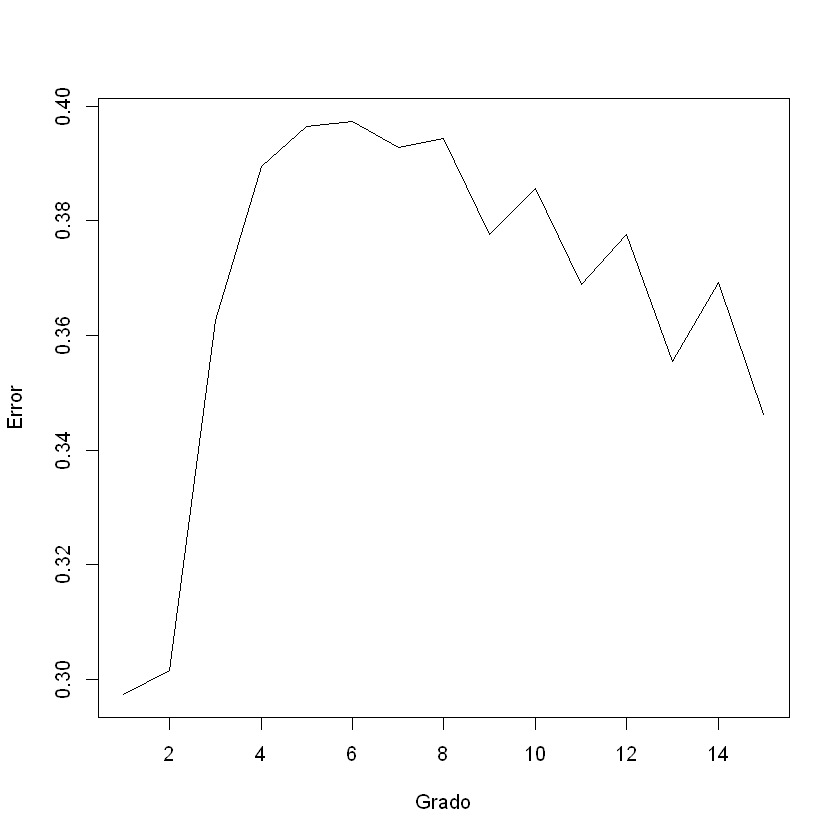

In [18]:
print(errors_svm_poly)
#plot de los errores
plot(x = 1:15, y = errors_svm_poly, type = "l", xlab = "Grado", ylab = "Error")

El error con kernel polinomial es un poco más alto que los anteriores. Parecería que a medida que aumenta el grado del polinomio va bajando el error, pero no tengo la paciencia suficiente para probarlo.

En conclusión, para todos los experimentos obtuve un error entre 0.23 y 0.4. El mejor fue el de random forest con 7 variables (refuerzo inconscientemente la afirmación de que random forest es muy bueno). Los peores son los de SVM.

Esto me pareción un buen punto de partida y me gustó analizar los datos. Claramente hay mucho más que se puede hacer. Por ejemplo, un análisis exploratorio de los datos más profundo y mejores tratamientos de los datos (seguramente sigue habiendo mucha basura o perdí información interesante).

Con respecto a los clústers, no tengo el conocimiento de dominio necesario para entender los resultados (si es que tienen algún sentido). Quizás con más paciencia y tiempo pueda interiorizarme más con el sistema y obtener un resultado interesante.

Los clasificadores me parecieron interesantes. No me esperaba que el error fuera tan bajo, y probablemente pueda mejorarlo si trabajo mejor los datos.

Charlando en la oficina mis compañeros me dijeron que sería interesante ver si puedo predecir qué seguro va a comprar el cliente en base a su mascota. Esto me pareció interesante, así que voy a hacer un análisis muy chiquitito para ver si puedo hacerlo.

In [20]:
mascotasFiltradas2 <- mascotasFiltradas[,-c(2,3,4,5,6,9,11)]
mascotasFiltradas2[1,]

,Id,Sexo,Fecha.Nacimiento,Producto,Medio.Pago,Tipo.Mascota,Mascota.Fec.Nac,Raza.Mascota,Sexo.Mascota
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8076,147211,0,1984.826,2,0,1,2014.771,30,0


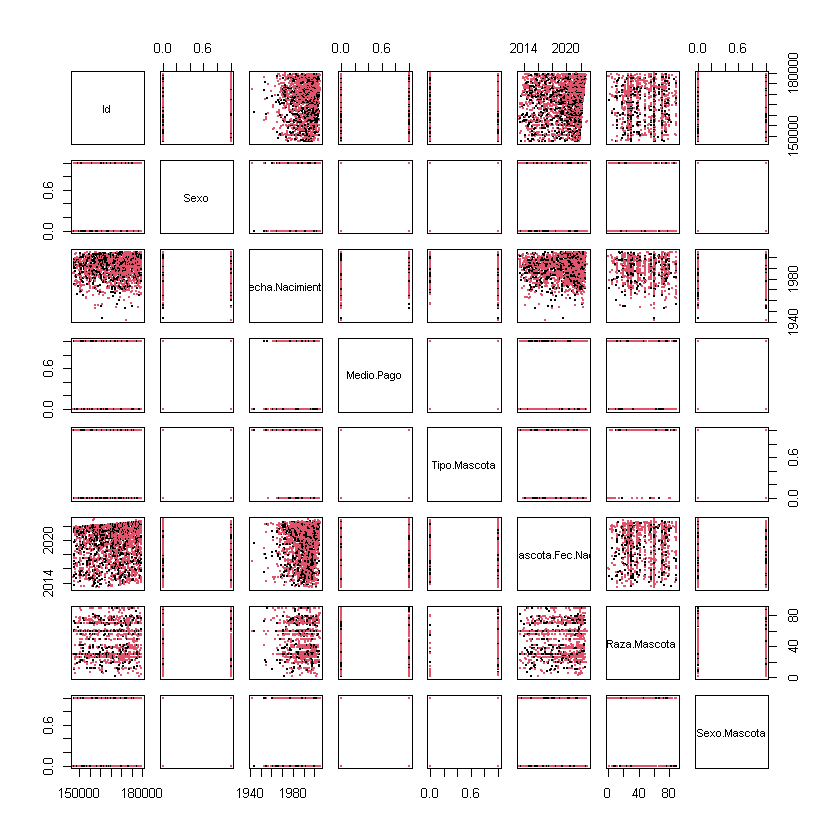

In [21]:
#plot mascotasFiltradas2 usando producto como color
plot(mascotasFiltradas2[,-4], col = mascotasFiltradas2[,4], pch = 20, cex = 0.5)

In [25]:
mascotasFiltradas2[,4] <- as.factor(mascotasFiltradas2[,4])
FORW.rf <-forward.ranking(mascotasFiltradas2[,-c(4,1)],mascotasFiltradas2[,4],method="rf.est" ,tot.trees=100,equalize.classes=F)
BACK.rf <-backward.ranking(mascotasFiltradas2[,-c(4,1)],mascotasFiltradas2[,4],method="rf.est" ,tot.trees=100,equalize.classes=F)
noP <- no.parametrico(mascotasFiltradas2[,-c(4,1)],mascotasFiltradas2[,4])
RFE.rf <- rfe(mascotasFiltradas2[,-c(4,1)],mascotasFiltradas2[,4],method="imp.rf",tot.trees=100,equalize.classes=F)

In [28]:
FORW.rf
BACK.rf
noP 
RFE.rf

$ordered.names.list
[1] "Fecha.Nacimiento" "Sexo"             "Raza.Mascota"     "Tipo.Mascota"    
[5] "Mascota.Fec.Nac"  "Medio.Pago"       "Sexo.Mascota"    

$ordered.features.list
[1] 2 1 6 4 5 3 7

$importance
Fecha.Nacimiento             Sexo     Raza.Mascota     Tipo.Mascota 
       1.0000000        0.8571429        0.7142857        0.5714286 
 Mascota.Fec.Nac       Medio.Pago     Sexo.Mascota 
       0.4285714        0.2857143        0.1428571

$ordered.names.list
[1] "Tipo.Mascota"     "Mascota.Fec.Nac"  "Fecha.Nacimiento" "Sexo"            
[5] "Raza.Mascota"     "Sexo.Mascota"     "Medio.Pago"      

$ordered.features.list
[1] 4 5 2 1 6 7 3

$importance
    Tipo.Mascota  Mascota.Fec.Nac Fecha.Nacimiento             Sexo 
       1.0000000        0.8571429        0.7142857        0.5714286 
    Raza.Mascota     Sexo.Mascota       Medio.Pago 
       0.4285714        0.2857143        0.1428571

$ordered.names.list
[1] "Sexo"             "Tipo.Mascota"     "Mascota.Fec.Nac"  "Fecha.Nacimiento"
[5] "Medio.Pago"       "Raza.Mascota"     "Sexo.Mascota"    

$ordered.features.list
[1] 1 4 5 2 3 6 7

$importance
            Sexo     Tipo.Mascota  Mascota.Fec.Nac Fecha.Nacimiento 
       1.0000000        0.8571429        0.7142857        0.5714286 
      Medio.Pago     Raza.Mascota     Sexo.Mascota 
       0.4285714        0.2857143        0.1428571

$ordered.names.list
[1] "Tipo.Mascota"     "Fecha.Nacimiento" "Mascota.Fec.Nac"  "Sexo"            
[5] "Raza.Mascota"     "Medio.Pago"       "Sexo.Mascota"    

$ordered.features.list
[1] 4 2 5 1 6 3 7

$importance
    Tipo.Mascota Fecha.Nacimiento  Mascota.Fec.Nac             Sexo 
       1.0000000        0.8571429        0.7142857        0.5714286 
    Raza.Mascota       Medio.Pago     Sexo.Mascota 
       0.4285714        0.2857143        0.1428571

Ahora sí entra en juego qué mascota estoy asegurando (perro o gato).

In [27]:
gap <- gap.statistic(mascotasFiltradas2[,-c(4,1)], 5, 1000)

In [29]:
gap

[1] 2

   
       1    2
  1  241  494
  2  577 1079

   
       0    1
  1   80  655
  2  573 1083

   
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
  1    1    2    1    1    9    2    1    3    3    1    6   22    1    1    4
  2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   
      16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
  1    3    2   12    4   27    4   25    2    2   13  125   27    3    7  245
  2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   
      31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
  1    5    1   17   10    5    3    2   52   39    1    6   28    3    2    2
  2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   
      46   47   48   49   50   51   52   53   54   55   56   57   58   59   60
  1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  2    1    7    1   31    2    3    2    6   14    1   43    1    1    1 1199
   
      61   62   63   64   65   6

   
      0   1
  1 322 413
  2 793 863

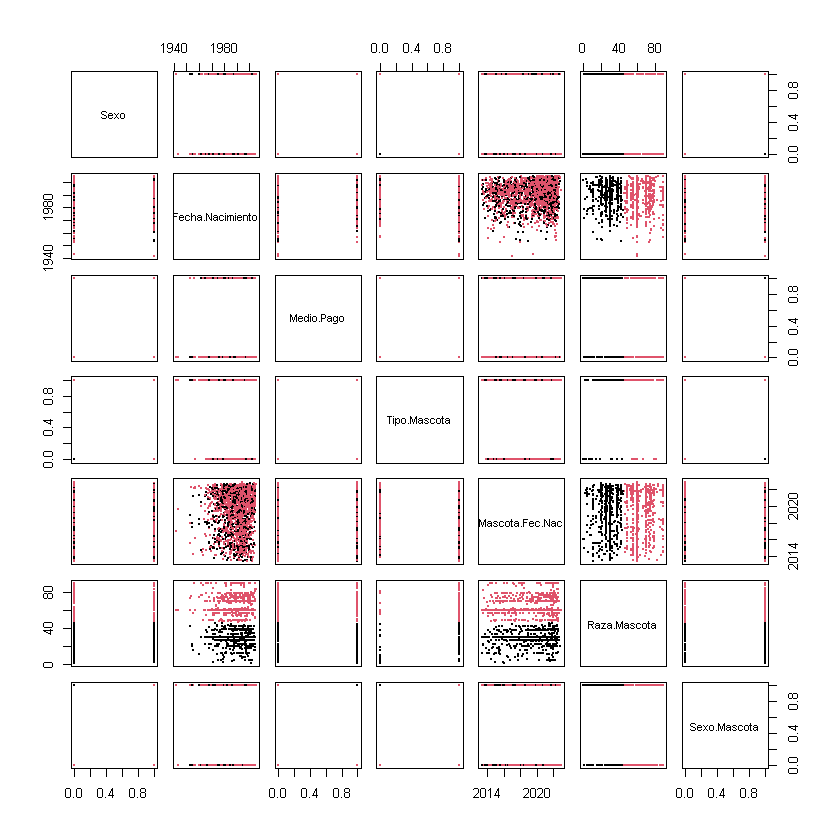

In [37]:
#kmeans con 2 clusters
clusters <- kmeans(mascotasFiltradas2[,-c(4,1)], 2)
#Plot de los clusters
plot(mascotasFiltradas2[,-c(4,1)], col = clusters$cluster, pch = 20, cex = 0.5)

table(clusters$cluster, mascotasFiltradas2[,4])
table(clusters$cluster, mascotasFiltradas2[,6])
table(clusters$cluster, mascotasFiltradas2[,8])
table(clusters$cluster, mascotasFiltradas2[,9])

Parece que separa algo entre las razas, pero debe ser súper artificial.

In [38]:
#pca de mascotasFiltradas2
pca <- prcomp(mascotasFiltradas2[,-c(4,1)])
gap <- gap.statistic(pca$x, 5, 1000)

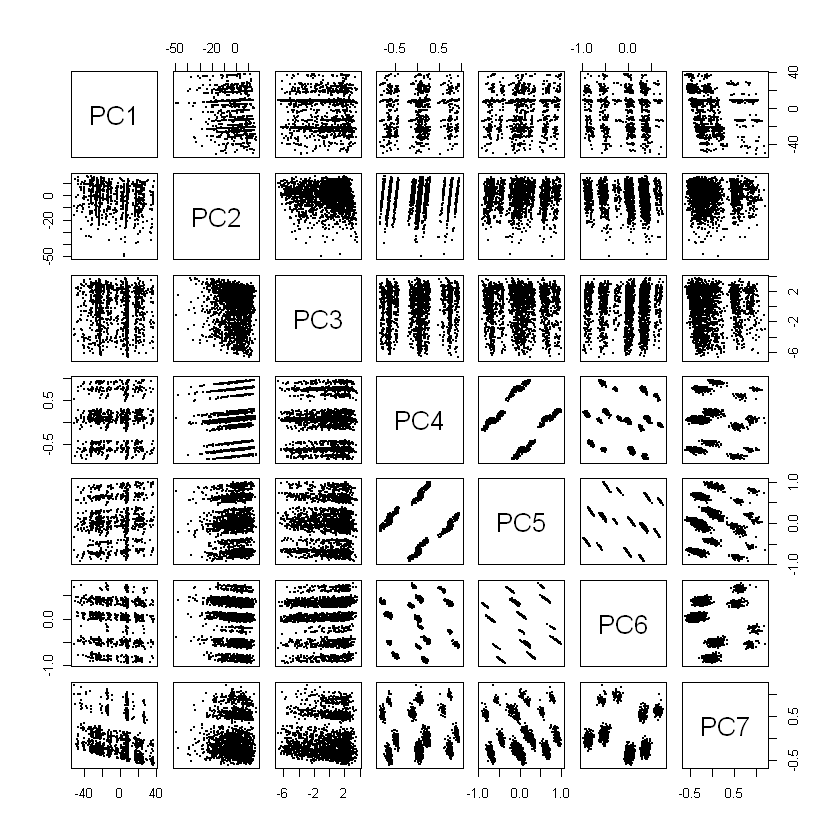

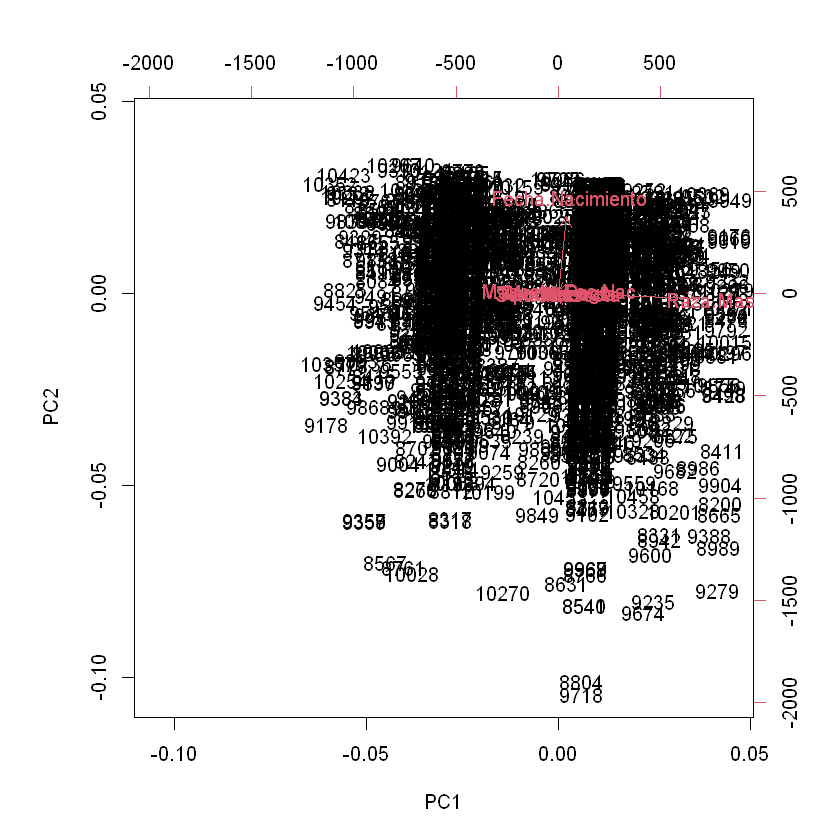

In [44]:
plot(as.data.frame(pca$x), pch = 20, cex = 0.5)
biplot(pca)

Esto de la PCA ya es completamente un misterio para mi. No sé qué es lo que está pasando.

In [39]:
gap

[1] 2

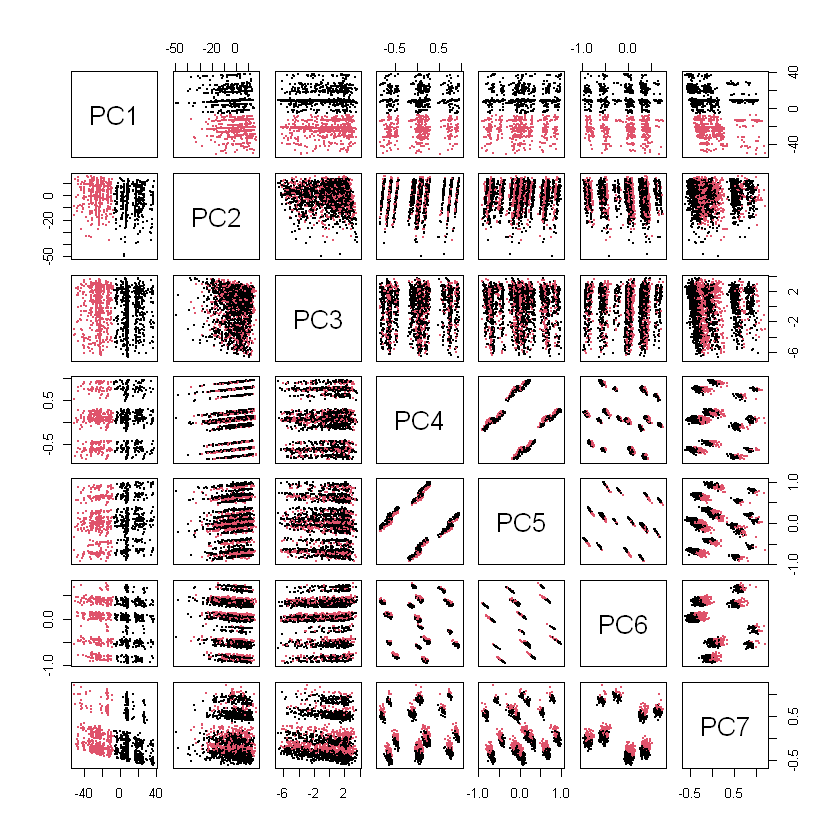

In [46]:
#kmeans con 2 clusters
clusters <- kmeans(pca$x, 2)
#Plot de los clusters
plot(as.data.frame(pca$x), col = clusters$cluster, pch = 20, cex = 0.5)


De nuevo, tiene pinta que está pasando cualquier cosa.

In [52]:
mascotasFiltradas2[,4] <- as.factor(mascotasFiltradas2[,4])
folds2 <- createFolds(mascotasFiltradas2[,4], k = 5, list = TRUE, returnTrain = TRUE)

In [50]:
mascotasFiltradas2[1,]

,Id,Sexo,Fecha.Nacimiento,Producto,Medio.Pago,Tipo.Mascota,Mascota.Fec.Nac,Raza.Mascota,Sexo.Mascota
,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8076,147211,0,1984.826,2,0,1,2014.771,30,0


In [53]:
cant.vars <- c() #Cantidad de variables a usar en cada paso
v <- 8 #Tenemos 9 variables menos el producto, o sea, 8
while(v >= 1){
    cant.vars <- c(cant.vars, v)
    v <- floor(v/2)
}
errors_rf <- double(length(cant.vars)) #Lista de errores
for (k in 1:length(cant.vars)){
    error_k <- double(5) #Vector de errores para el k actual
    for(i in 1:5){
        rf <- randomForest(Producto ~ . , data = mascotasFiltradas2, mtry = cant.vars[k], ntree = 1000) #1000 es el número mágico de árboles
        # miss <- rf$confusion[1,2] + rf$confusion[2,1] #Cantidad de errores
        # print(rf$confusion)
        # error_k[i] <- miss/dim(mascotasFiltradas)[1] #Cantidad total
        #OOB error
        error_k[i] <- rf$err.rate[1000]
    }
    errors_rf[k] <- mean(error_k) #Guardo los errores para el k actual
}

[1] 0.2982852 0.2932664 0.3093266 0.3421163

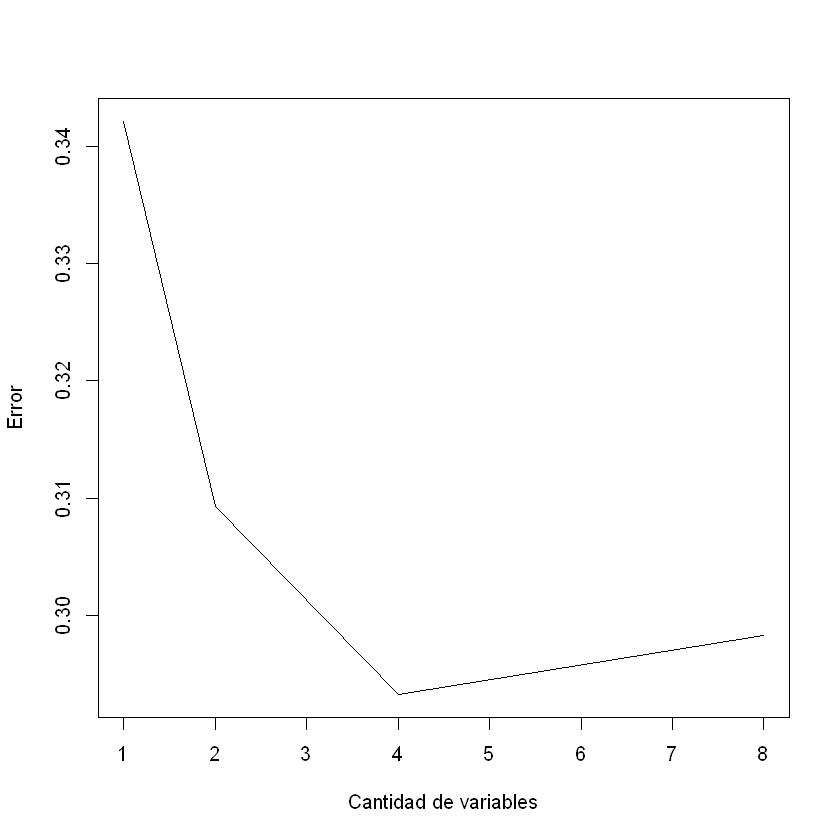

In [55]:
errors_rf
plot(x = cant.vars, y = errors_rf, type = "l", xlab = "Cantidad de variables", ylab = "Error")

Un error demasiado alto para mi gusto, y acá potencialmente hay un buen negocio reduciendo el error. A ver si hago boosting.

In [ ]:
errors_producto_boosting <- double(20)

for(k in 2:20){
    errors_iteration <- double(5)
    for(i in 1:5){
        trainData <- mascotasFiltradas2[folds[[i]], ]
        testData <- mascotasFiltradas2[-folds[[i]], ]
        # Entrenamos
        producto.Adaboost <- boosting(Producto ~ ., data = trainData, mfinal = 200, coef="Freund", control = rpart.control(maxdepth = k)) 
        errors_iteration[i] <- predict(producto.Adaboost, newdata = testData, type = "class")$error
    }
    errors_producto_boosting[k] <- mean(errors_iteration)
}

In [61]:
for(k in 1:1){
    errors_iteration <- double(5)
    for(i in 1:5){
        trainData <- mascotasFiltradas2[folds[[i]], ]
        testData <- mascotasFiltradas2[-folds[[i]], ]
        # Entrenamos
        producto.Adaboost <- boosting(Producto ~ ., data = trainData, mfinal = 200, coef="Freund", control = rpart.control(maxdepth = k)) 
        errors_iteration[i] <- predict(producto.Adaboost, newdata = testData, type = "class")$error
    }
    errors_producto_boosting[k] <- mean(errors_iteration)
}

[1] 0.3492397 0.3500722 0.3563458 0.3462978 0.3630597 0.3530046 0.3638746
 [8] 0.3609518 0.3684631 0.3509239 0.3429574 0.3613903 0.3659492 0.3580412
[15] 0.3504784 0.3525906 0.3500696 0.3496468 0.3592746 0.3517441

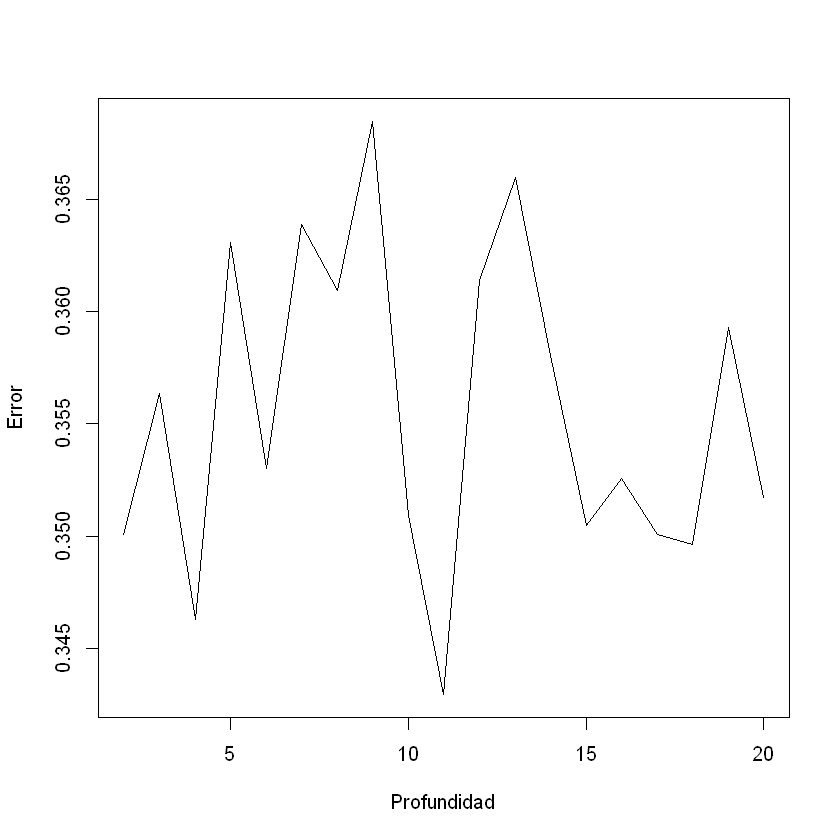

In [62]:
errors_producto_boosting
plot(x = 2:20, y = errors_producto_boosting[2:20], type = "l", xlab = "Profundidad", ylab = "Error")

Mmmm boosting no se está comportando de manera linda, definitivamente hay que hacer un mejor tratamiento de las variables y recaudar más información para sacar algo potable de esta idea.

En conclusión: me pareció súper interesante la materia y me gustaría aprender más sobre algunos otros temas como detección de novedades y regresión (aunque no me arrepiento de haber cursado Bases de Datos Avanzadas en el primer cuatrmiestre). 

Espero poder aplicar lo que aprendí en el futuro, y que me sirva para hacer cosas más divertidas en mi trabajo actual.